# CLUSTERING

## Packages Declaration

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd # For reading datasets
import numpy as np # For computations
import matplotlib.pyplot as plt # For visualization
from pandas import DataFrame # For creating data frame

from sklearn.cluster import KMeans # For 1st model implementation

from sklearn.mixture import GaussianMixture # For 2nd model implementation
from sklearn import datasets # For the iris dataset

from sklearn.cluster import AgglomerativeClustering # For 3rd model implementation
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN # For 4th model implementation
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *

## Centroid-Based Clustering Method
**Implementation of the K-Means Clustering Algorithm**

| Concept                          | Description                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| **Centroid-Based Clustering**    | A clustering technique where each cluster is represented by a central point (centroid), which is the mean of all data points in the cluster. |
| **K-Means Clustering Algorithm** | Iteratively partitions data into K clusters by minimizing the variance within each cluster.<br>**Steps:**<br>1. Initialize K centroids.<br>2. Assign points to nearest centroid.<br>3. Update centroids as mean of assigned points.<br>4. Repeat until convergence. |

In [3]:
# initialization and declaration
Data={'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
      'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]}
df = DataFrame(Data,columns=['x','y'])

KMeans Clustering Results with 3 Clusters

Cluster 1:
  Number of points: 6
  Centroid coordinates: x = 62.3333, y = 15.8333
  Sample points:
     x   y
13  53  23
14  55  14
15  61   8

Cluster 2:
  Number of points: 6
  Centroid coordinates: x = 50.0000, y = 63.1667
  Sample points:
    x   y
7  45  59
8  45  63
9  52  70

Cluster 3:
  Number of points: 7
  Centroid coordinates: x = 23.4286, y = 44.5714
  Sample points:
    x   y
0  12  39
1  20  36
2  28  30

Centroid Summary Table:
         Centroid_X  Centroid_Y
Cluster                        
0         62.333333   15.833333
1         50.000000   63.166667
2         23.428571   44.571429


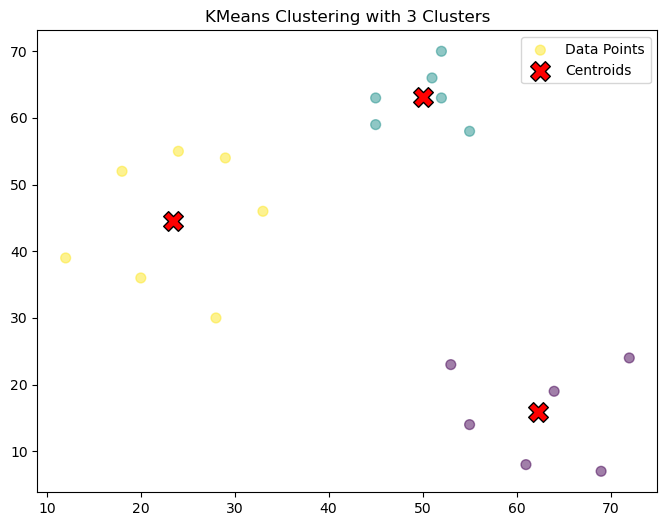

In [4]:
# Create and fit the KMeans model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
kmeans.fit(df)

# Find the centroids of the clusters
centroids = kmeans.cluster_centers_

# Print detailed cluster info
print("=" * 50)
print(f"KMeans Clustering Results with {n_clusters} Clusters")
print("=" * 50)
for i in range(n_clusters):
    cluster_points = df[kmeans.labels_ == i]
    print(f"\nCluster {i+1}:")
    print(f"  Number of points: {len(cluster_points)}")
    print(f"  Centroid coordinates: x = {centroids[i][0]:.4f}, y = {centroids[i][1]:.4f}")
    print(f"  Sample points:\n{cluster_points.head(3)}")
print("=" * 50)

# Optional: show all centroids in a table
centroid_df = pd.DataFrame(centroids, columns=['Centroid_X', 'Centroid_Y'])
centroid_df.index.name = "Cluster"
print("\nCentroid Summary Table:")
print(centroid_df)

# Plot the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=kmeans.labels_, s=50, alpha=0.5, cmap='viridis', label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', edgecolor='black', label="Centroids")
plt.title(f"KMeans Clustering with {n_clusters} Clusters")
plt.legend()
plt.show()

**KMeans Model Attributes**

| Attribute           | Type & Description                                                                                                                                 |
| ------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| `cluster_centers_`  | `ndarray (n_clusters, n_features)`: Coordinates of each cluster center.)                     |
| `labels_`           | `ndarray (n_samples,)`: Cluster label for each data point.                                   |
| `inertia_`          | `float`: Sum of squared distances to nearest cluster center (within-cluster sum of squares). |
| `n_iter_`           | `int`: Number of iterations run to converge.                                                 |
| `n_features_in_`    | `int`: Number of features seen during fit.                                                   |
| `feature_names_in_` | `ndarray`: Names of features (if input DataFrame had named columns).                         |

**KMeans Parameters**

| Parameter      | Type & Default                                                         | Description                                                                                |
| -------------- | ---------------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| `n_clusters`   | `int`, default=8                                                       | Number of clusters (and centroids) to form.      |
| `init`         | `{'k-means++', 'random'}`, callable or array-like, default=`k-means++` | Method for initializing centroids.                      |
| `n_init`       | `int` or `'auto'`, default=`'auto'`                                    | Number of runs with different initializations; best result is kept.|
| `max_iter`     | `int`, default=300                                                     | Max iterations per run.                                |
| `tol`          | `float`, default=1e-4                                                  | Convergence threshold (Frobenius norm difference).     |
| `verbose`      | `int`, default=0                                                       | Controls verbosity level.                                |
| `random_state` | `int`, `RandomState` or `None`, default=`None`                         | Controls randomness for reproducibility.                 |
| `copy_x`       | `bool`, default=`True`                                                 | If `False`, original data may be overwritten for speed. |
| `algorithm`    | `{'lloyd','elkan'}`, default=`lloyd`                                   | K-Means algorithm variant; `'elkan'` can be faster for dense datasets.|


**`plt.scatter` Parameters**

| Parameter       | Type & Default                              | Description                                                                     |
| --------------- | ------------------------------------------- | ------------------------------------------------------------------------------- |
| `x`             | array-like                                  | The data positions on the x-axis.                                               |
| `y`             | array-like                                  | The data positions on the y-axis.                                               |
| `s`             | float or array-like, default=`20`           | Marker size in points². If array, size varies per point.                        |
| `c`             | color, sequence, or 2D array, default=`'b'` | Color(s) of the markers. Can be single color or sequence for each point.        |
| `marker`        | `MarkerStyle`, default=`'o'`                | Marker shape (e.g., `'o'`, `'^'`, `'s'`, etc.).                                 |
| `cmap`          | `Colormap` or name, default=`None`          | Colormap to map `c` values if numeric.                                          |
| `norm`          | `Normalize`, default=`None`                 | Normalization for `c` values when using a colormap.                             |
| `vmin`, `vmax`  | scalar, default=`None`                      | Value limits for colormap scaling.                                              |
| `alpha`         | float, default=`None`                       | Transparency (0.0 transparent → 1.0 opaque).                                    |
| `linewidths`    | float or array-like, default=`None`         | Width of marker edges in points.                                                |
| `edgecolors`    | `{'face', 'none', color}`, default=`'face'` | Edge color of markers.                                                          |
| `plotnonfinite` | bool, default=`False`                       | Whether to plot points with NaN or Inf values.                                  |
| `**kwargs`      |                                             | Additional keyword arguments passed to `matplotlib.collections.PathCollection`. |

---

## Gaussian Mixture Models (GMM)
**Implementation of the Expectation-Maximization (EM) Algorithm**

| Concept                              | Description                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| **Gaussian Mixture Models (GMM)**    | Probabilistic model assuming data is generated from a mixture of Gaussian distributions |
| **Expectation-Maximization (EM)**    | Alternates between estimating membership probabilities (E-step) and updating parameters (M-step) |

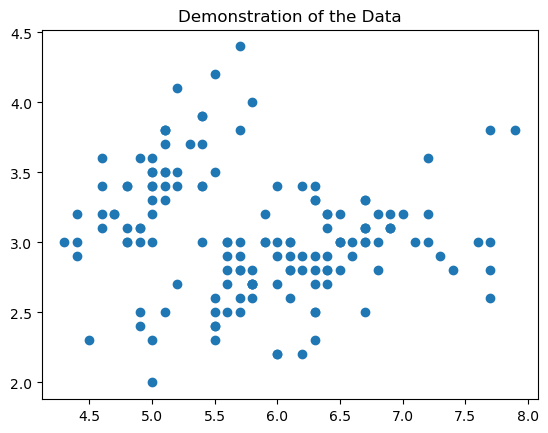

In [5]:
# initialization and declaration
iris = datasets.load_iris()
# select first two columns
X = iris.data[:, :2]
# turn it into a dataframe
d = pd.DataFrame(X)
# plot the data
plt.scatter(d[0], d[1])
plt.title('Demonstration of the Data')
plt.show()

Converged: True
Iterations: 8


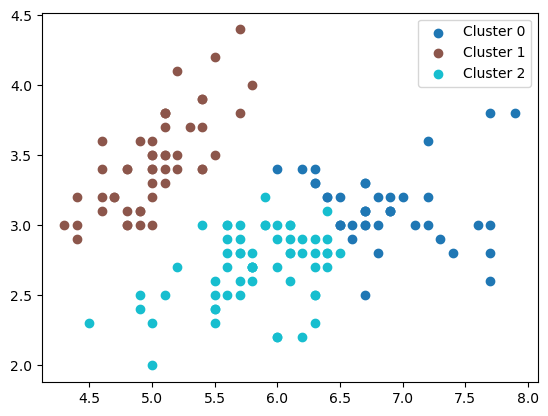

In [6]:
# If it's a DataFrame with numeric columns:
X = d.values if hasattr(d, 'values') else d  # ensure numpy array

# fit the data as a mixture of 3 Gaussians
n_clusters = 3
gmm = GaussianMixture(n_components = n_clusters)
gmm.fit(d)
# predict the cluster of each data record
labels = gmm.predict(d)
# Check if the model has converged
print('Converged:',gmm.converged_)
# print the number of iterations needed
print('Iterations:', gmm.n_iter_) 

# get the final “means” for each cluster
means = gmm.means_
#means

# get the final “standard deviations” (i.e., covariance matrix) for each cluster
covariances = gmm.covariances_
#covariances


# Add labels column if d is a DataFrame
if hasattr(d, 'assign'):
    d['labels'] = labels
    
# Colors for plotting
colors = plt.cm.get_cmap('tab10', n_clusters)  # up to 10 distinct colors

# Plot dynamically
for cluster_id in range(n_clusters):
    cluster_points = X[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=colors(cluster_id), label=f'Cluster {cluster_id}')

plt.legend()
plt.show()

**GaussianMixture Model Attributes**

| Attribute              | Type                                          | Description                                                                |
| ---------------------- | --------------------------------------------- | -------------------------------------------------------------------------- |
| `weights_`             | `ndarray`, shape (n\_components,)             | Mixing weights of each Gaussian.                                           |
| `means_`               | `ndarray`, shape (n\_components, n\_features) | Mean of each Gaussian component.                                           |
| `covariances_`         | `ndarray`                                     | Covariance matrices of each component. Shape depends on `covariance_type`. |
| `precisions_`          | `ndarray`                                     | Precision matrices (inverse of covariance matrices) for each component.    |
| `precisions_cholesky_` | `ndarray`                                     | Cholesky decomposition of precisions.                                      |
| `converged_`           | `bool`                                        | `True` if EM algorithm converged.                                          |
| `n_iter_`              | `int`                                         | Number of EM iterations performed.                                         |
| `lower_bound_`         | `float`                                       | Log likelihood of the best fit.                                            |
| `weights_init`         | `ndarray`                                     | Initial weights passed (if any).                                           |
| `means_init`           | `ndarray`                                     | Initial means passed (if any).                                             |


**GaussianMixture Parameters**

| Parameter          | Type                                                     | Default    | Description                                                                                                                                                                                                                                                                                                             |
| ------------------ | -------------------------------------------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `n_components`     | `int`                                                    | `1`        | Number of mixture components (clusters) to use.                                                                                                                                                                                                                                                                         |
| `covariance_type`  | `{'full', 'tied', 'diag', 'spherical'}`                  | `'full'`   | Type of covariance parameters to use: <br>• `'full'`: Each component has its own general covariance matrix.<br>• `'tied'`: All components share the same covariance matrix.<br>• `'diag'`: Each component has its own diagonal covariance matrix.<br>• `'spherical'`: Each component has its own single variance value. |
| `tol`              | `float`                                                  | `1e-3`     | Convergence threshold for EM algorithm.                                                                                                                                                                                                                                                                                 |
| `reg_covar`        | `float`                                                  | `1e-6`     | Regularization added to the diagonal of covariance matrices to ensure numerical stability.                                                                                                                                                                                                                              |
| `max_iter`         | `int`                                                    | `100`      | Maximum number of EM iterations.                                                                                                                                                                                                                                                                                        |
| `n_init`           | `int`                                                    | `1`        | Number of initializations to perform. Best result kept.                                                                                                                                                                                                                                                                 |
| `init_params`      | `{'kmeans', 'random'}`                                   | `'kmeans'` | Method used to initialize parameters.                                                                                                                                                                                                                                                                                   |
| `weights_init`     | `array-like, shape (n_components,)`, optional            | `None`     | Initial weights for each mixture component.                                                                                                                                                                                                                                                                             |
| `means_init`       | `array-like, shape (n_components, n_features)`, optional | `None`     | Initial means for each component.                                                                                                                                                                                                                                                                                       |
| `precisions_init`  | `array-like`                                             | `None`     | Initial precisions (inverse of covariance matrices).                                                                                                                                                                                                                                                                    |
| `warm_start`       | `bool`                                                   | `False`    | If `True`, reuse solution from previous fit to initialize.                                                                                                                                                                                                                                                              |
| `verbose`          | `int`                                                    | `0`        | Verbosity level (0 = silent).                                                                                                                                                                                                                                                                                           |
| `verbose_interval` | `int`                                                    | `10`       | Frequency of log output during iterations if `verbose > 0`.                                                                                                                                                                                                                                                             |
| `random_state`     | `int`, `RandomState` instance or `None`                  | `None`     | Controls the random seed for reproducibility.                                                                                                                                                                                                                                                                           |


## Hierarchical Clustering (Agglomerative)
**Implementation of the Agglomerative clustering algorithm**

| Concept                              | Description                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| **Hierarchical Clustering**          | Builds a hierarchy of clusters via agglomerative (merge) or divisive (split) approach |
| **Agglomerative Clustering Algorithm**| Start with each point as its own cluster → Merge closest clusters based on linkage criterion → Repeat until stop condition or one cluster |

In [7]:
# initialization and declaration

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
n_customers = 440

# Create numeric features (annual spending in some range)
data = {
    'Fresh': np.random.randint(100, 20000, size=n_customers),
    'Milk': np.random.randint(50, 12000, size=n_customers),
    'Grocery': np.random.randint(50, 15000, size=n_customers),
    'Frozen': np.random.randint(10, 5000, size=n_customers),
    'Detergents': np.random.randint(5, 3000, size=n_customers),
    'Delicatessen': np.random.randint(5, 4000, size=n_customers),
    # Randomly assign Channels
    'Channel': np.random.choice(['Hotel', 'Restaurant', 'Cafe', 'Retail'], size=n_customers),
    # Randomly assign Regions
    'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n_customers)
}

df = pd.DataFrame(data)
# Show first few rows
print(df.head())

   Fresh   Milk  Grocery  Frozen  Detergents  Delicatessen     Channel Region
0  15895   3423    10398    2153        1088          2961       Hotel   West
1    960  10788     9411    1321        2482          2211  Restaurant  North
2   5490   8995    10400    3201         989          3659  Restaurant   West
3  12064   2132     6421    2548        1685          3011      Retail  South
4  11384  11016     4256    3993         524          2364  Restaurant  South


In [8]:
#Normalize the dataset to get all the features at the same scale using 'normalize' from 'sklearn.preprocessing'

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Channel', 'Region'], drop_first=True)

# Normalize all columns (numeric + one-hot encoded categorical)
data_scaled = normalize(df_encoded)

# Convert back to DataFrame
df_scaled = pd.DataFrame(data_scaled, columns=df_encoded.columns)

# Show first few rows
print(df_scaled.head())

      Fresh      Milk   Grocery    Frozen  Detergents  Delicatessen  \
0  0.807912  0.173984  0.528510  0.109433    0.055301      0.150502   
1  0.064921  0.729546  0.636426  0.089334    0.167847      0.149521   
2  0.351589  0.576055  0.666033  0.204997    0.063337      0.234329   
3  0.833066  0.147223  0.443395  0.175949    0.116356      0.207921   
4  0.667493  0.645915  0.249548  0.234127    0.030724      0.138611   

   Channel_Hotel  Channel_Restaurant  Channel_Retail  Region_North  \
0       0.000051            0.000000        0.000000      0.000000   
1       0.000000            0.000068        0.000000      0.000068   
2       0.000000            0.000064        0.000000      0.000000   
3       0.000000            0.000000        0.000069      0.000000   
4       0.000000            0.000059        0.000000      0.000000   

   Region_South  Region_West  
0      0.000000     0.000051  
1      0.000000     0.000000  
2      0.000000     0.000064  
3      0.000069     0.000000

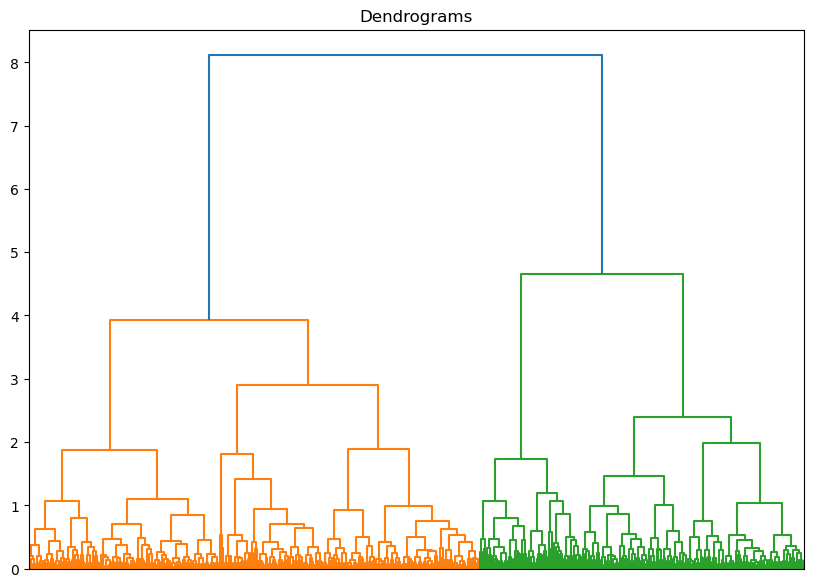

In [9]:
# Draw the dendrogram to find the optimum number of clusters using scipy.cluster.hierarchy (shc)
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")

# Use the normalized data values (NumPy array)
dend = shc.dendrogram(shc.linkage(df_scaled.values, method='ward'), no_labels=True)

# First, shc.linkage(df_scaled.values, method='ward') computes the linkage matrix from your normalized data.
#Then, shc.dendrogram(...) takes this linkage matrix and draws the dendrogram plot.
#The result of dendrogram() is stored in dend, which contains details like the order of points and cluster distances 

plt.show()

**`scipy.cluster.hierarchy.dendrogram()` Function**

| Parameter        | Default       | Description                                                                                        |
|------------------|---------------|----------------------------------------------------------------------------------------------------|
| `Z`              | —             | The linkage matrix (output of `linkage()`), encoding the hierarchical clustering                   |
| `p`              | None          | Controls the number of leaf nodes shown in the plot                                                |
| `truncate_mode`  | None          | Controls how to truncate the dendrogram (`'lastp'`, `'level'`, or None)                            |
| `color_threshold`| None          | Threshold to apply colors to branches                                                              |
| `leaf_rotation`  | 0             | Rotation angle of leaf labels in degrees                                                           |
| `leaf_font_size` | 10            | Font size of leaf labels                                                                           |
| `show_contracted`| False         | Whether to show contracted clusters                                                                |
| `link_color_func`| None          | Function to specify colors for linkage lines                                                       |

---

**`scipy.cluster.hierarchy.linkage()` Function**

| Parameter          | Default    | Description                                                                                             |
|--------------------|------------|---------------------------------------------------------------------------------------------------------|
| `y`                | —          | Input data or condensed distance matrix                                                                 |
| `method`           | 'single'   | The linkage algorithm to use: `'single'`, `'complete'`, `'average'`, `'ward'`, etc.                     |
| `metric`           | 'euclidean'| The distance metric to use (ignored if `y` is a distance matrix)                                        |
| `optimal_ordering` | False      | Whether to reorder the linkage matrix to minimize distances between successive leaves                   |

In [10]:
# hence we can decide an optimum number of clusters equals 2
# apply hierarchical clustering for two clusters only
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_scaled)

# where “0” implies a customer in the first cluster, and “1” implies a customer in the second cluster.

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,

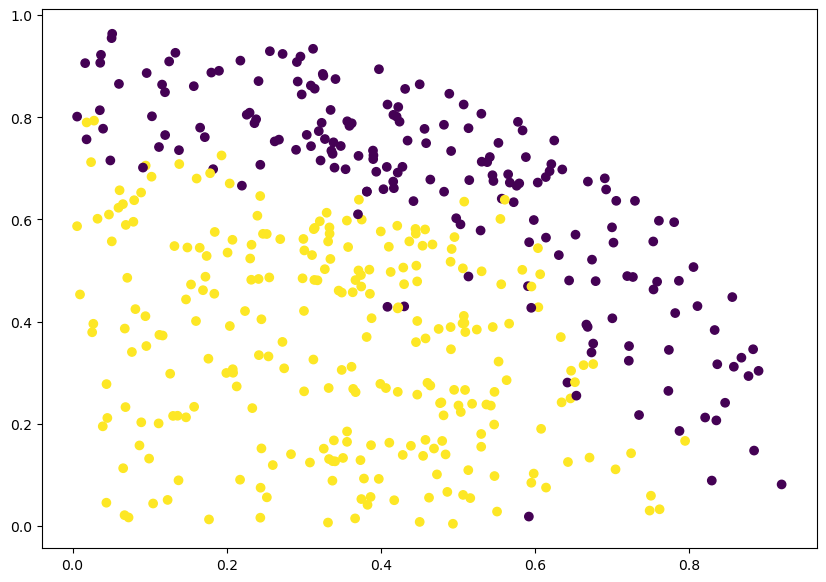

In [11]:
# To visualize the two clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled['Milk'], df_scaled['Grocery'], c=cluster.labels_)
plt.show()

**AgglomerativeClustering Attributes**


| Attribute                 | Description                                                     |
|---------------------------|-----------------------------------------------------------------|
| `labels_`                 | Cluster labels assigned to each data point                      |
| `n_leaves_`               | Number of leaves in the hierarchical tree                       |
| `n_connected_components_` | Number of connected components in the graph                     |
| `children_`               | The children of each non-leaf node in the hierarchical tree     |
| `distances_`              | Distances between nodes in the linkage tree (if computed)       |


**AgglomerativeClustering Parameters**


| Parameter            | Default        | Description                                                                                               |
|----------------------|----------------|-----------------------------------------------------------------------------------------------------------|
| `n_clusters`         | 2              | The number of clusters to find                                                                            |
| `affinity`           | 'euclidean'    | Metric used to compute linkage (`'euclidean'`, `'l1'`, `'l2'`, `'manhattan'`, `'cosine'`, or precomputed) |
| `memory`             | None           | Used to cache the tree; can speed up future computations                                                  |
| `connectivity`       | None           | Connectivity matrix defining neighbors for constrained clustering                                         |
| `compute_full_tree`  | 'auto'         | Whether to compute the full tree or stop early when possible                                              |
| `linkage`            | 'ward'         | Linkage criterion (`'ward'`, `'complete'`, `'average'`, `'single'`)                                       |
| `distance_threshold` | None           | The linkage distance threshold above which clusters will not be merged                                    |

---


**AgglomerativeClustering `.fit_predict()` Method**

| Method           | Description                                                   |
|------------------|---------------------------------------------------------------|
| `fit_predict(X)` | Fits the hierarchical clustering from data `X` and returns the cluster labels for each sample in `X`. |

---

## Density-Based Clustering (DBSCAN)
**Implementation of the DBSCAN (density-based spatial clustering for applications with noise) algorithm**

| Concept                    | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| **Density-Based Clustering** | Groups points in high-density areas and marks low-density points as noise |
| **DBSCAN Algorithm**       | 1. Pick unvisited point<br>2. Get neighbors within ε radius<br>3. If ≥ min_samples, form cluster and expand<br>4. Mark remaining points as noise |

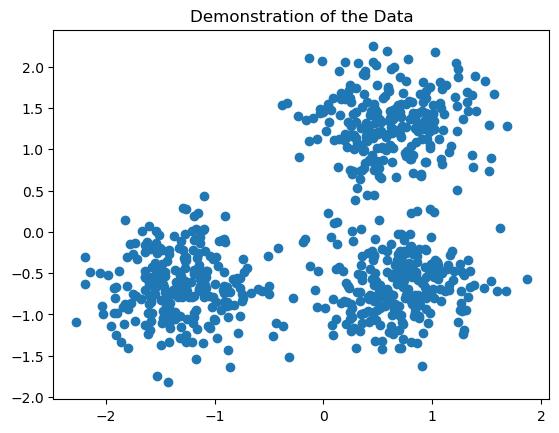

In [12]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

# Scale and standardize the dataset
X = StandardScaler().fit_transform(X)

xx, yy = zip(*X)
scatter(xx,yy)
plt.title('Demonstration of the Data')
show()

| Function          | Inputs                                      | Outputs                                   |
|-------------------|---------------------------------------------|-------------------------------------------|
| `make_blobs()`    | `n_samples` (int or list), `n_features` (int), `centers` (int or array), `cluster_std` (float or list), `random_state` (int), ... | Tuple `(X, y)` where `X` is an array of shape `(n_samples, n_features)` with generated samples, and `y` is an array of cluster labels for each sample. |
| `StandardScaler()`| No direct inputs when initializing; can pass `copy`, `with_mean`, `with_std` parameters. | Returns a scaler object which can be fitted to data and used to transform it. |
| `fit_transform()` | Called on scaler object; takes data array-like `X` (shape `(n_samples, n_features)`) as input. | Returns transformed data (scaled/standardized) as a NumPy array of same shape `(n_samples, n_features)`. |
| `zip()`           | One or more iterables (lists, tuples, etc.) as positional arguments. | Returns an iterator of tuples, where the i-th tuple contains the i-th element from each input iterable. |


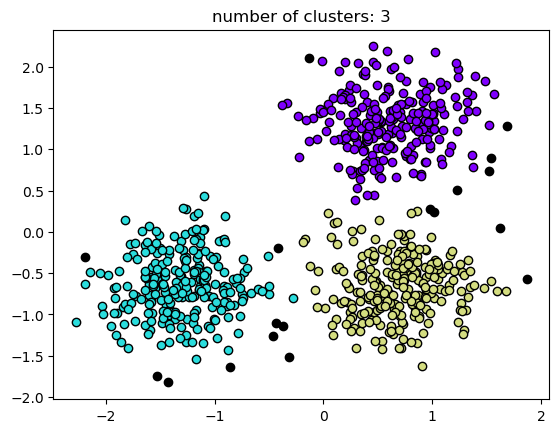

In [13]:
# Set up DBSCAN parameters
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples = db.core_sample_indices_
#core_samples

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# the number of clusters
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
#n_clusters_
labels = db.labels_
#labels
# if the label equals “-1”, this means the data record is an outlier.

# find the outliers
outliers = X[labels == -1]
#outliers

# Plot the results with a specific color for each cluster, and a black color for the noise points
unique_labels = set(labels)
#unique_labels

colors = cm.rainbow(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,markeredgecolor='k',markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,markeredgecolor='k',markersize=6)
plt.title('number of clusters: %d' %n_clusters_)
plt.show()

| **Attribute / Parameter** | **Type / Default**           | **Description**                                                    |
|--------------------------|-----------------------------|--------------------------------------------------------------------|
| **Parameters:**          |                             |                                                                    |
| `eps`                   | float, default=0.5          | The maximum distance between two samples to be considered neighbors. |
| `min_samples`           | int, default=5              | The minimum number of samples in a neighborhood for a point to be considered a core point. |
| `metric`                | string or callable, default='euclidean' | The metric to use for distance computation.                       |
| `algorithm`             | {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto' | Algorithm to compute nearest neighbors.                          |
| `leaf_size`             | int, default=30             | Leaf size for BallTree or KDTree.                                 |
| `p`                     | int, default=2              | Power parameter for the Minkowski metric.                         |
| `n_jobs`                | int, default=None           | Number of parallel jobs to run.                                   |
| **Attributes:**         |                             |                                                                    |
| `core_sample_indices_` | array-like of shape (n_core_samples,) | Indices of core samples.                                           |
| `components_`          | array-like of shape (n_core_samples, n_features) | Copy of each core sample found by training.                     |
| `labels_`              | array-like of shape (n_samples,) | Cluster labels for each point. Noise points are labeled `-1`.    |


## SUMMARY FOR CLUSTERING

| Method                      | Model Type                 | Strengths                    | Weaknesses                 | Steps |
|-----------------------------|----------------------------|------------------------------|----------------------------|-------|
| **K-Means**                 | Centroid-based             | Fast, scalable               | Spherical clusters only    | Init → Assign → Update → Repeat |
| **GMM**                     | Probabilistic (Gaussian)   | Soft clustering, flexible    | Sensitive to init & noise  | Init → E-step (probs) → M-step (params) → Repeat |
| **Hierarchical (Agglomerative)** | Tree-based             | No need for k, dendrogram    | Slow for large datasets    | Start singletons → Merge closest → Repeat until 1 cluster |
| **DBSCAN**                   | Density-based              | Arbitrary shapes, outliers   | Struggles w/ varying dens  | Pick point → Expand cluster via ε & minPts → Repeat |


## All in one code (Example)

Insight for Agglomerative Clustering: The Dendrogram


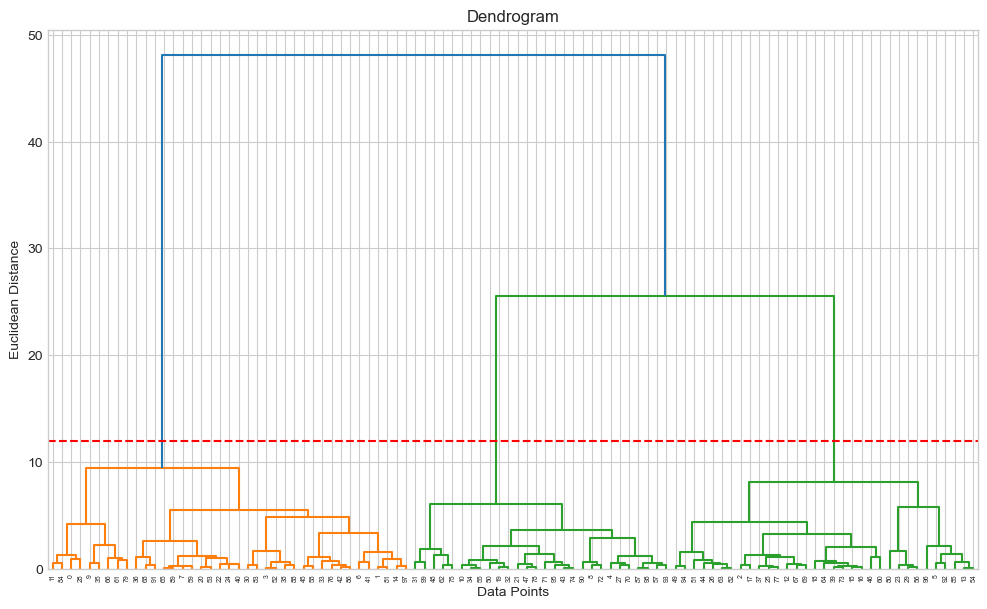

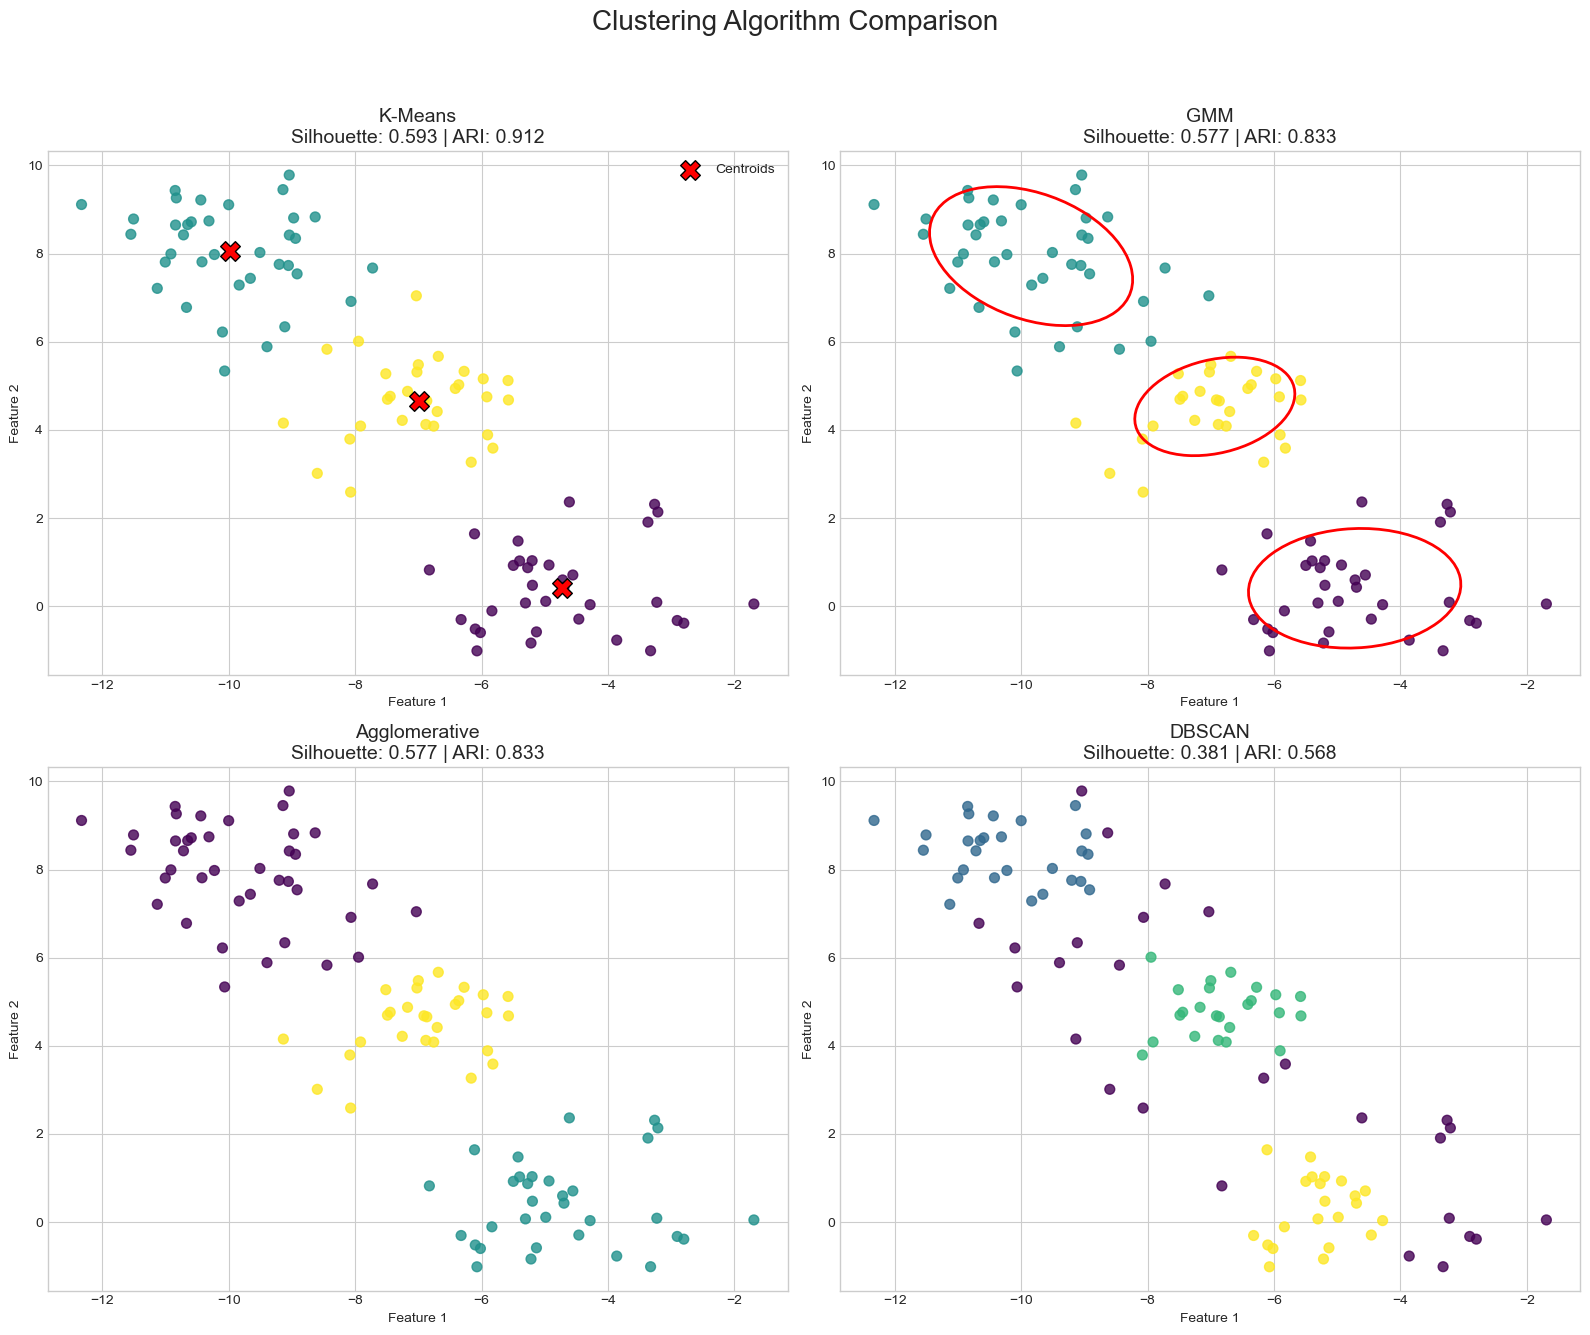


           Final Quantitative Results             
        Model  Silhouette Score  Adjusted Rand Score
      K-Means          0.592867             0.911912
          GMM          0.576783             0.832721
Agglomerative          0.576783             0.832721
       DBSCAN          0.381011             0.567805


In [14]:
# =============================================================================
# STEP 1: IMPORTS AND SETUP
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from matplotlib.patches import Ellipse
import os # Import the os module
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')

# =============================================================================
# STEP 2: DATA GENERATION
# =============================================================================
# Capture the true labels `y_true` for evaluation
X, y_true = make_blobs(n_samples=100, centers=3, n_features=2, random_state=12)

# Create a DataFrame for easy plotting and manipulation
ds = pd.DataFrame(X, columns=['feature_1', 'feature_2'])


# =============================================================================
# PRE-ANALYSIS: DENDROGRAM FOR AGGLOMERATIVE CLUSTERING
# =============================================================================
print("=" * 50)
print("Insight for Agglomerative Clustering: The Dendrogram")
print("=" * 50)
plt.figure(figsize=(12, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=12, color='r', linestyle='--')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


# =============================================================================
# STEP 3: INITIALIZE MODELS AND PLOTTING FIGURE
# =============================================================================
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
gmm = GaussianMixture(n_components=3, random_state=42)
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
dbscan = DBSCAN(eps=1, min_samples=10)

models = {
    "K-Means": kmeans,
    "GMM": gmm,
    "Agglomerative": agg_cluster,
    "DBSCAN": dbscan
}

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()
results = []


# =============================================================================
# STEP 4: FIT, EVALUATE, AND PLOT EACH MODEL
# =============================================================================
for i, (name, model) in enumerate(models.items()):
    labels = model.fit_predict(X)
    silhouette = metrics.silhouette_score(X, labels)
    ari = metrics.adjusted_rand_score(y_true, labels)
    results.append({'Model': name, 'Silhouette Score': silhouette, 'Adjusted Rand Score': ari})

    ax = axes[i]
    ax.scatter(ds['feature_1'], ds['feature_2'], c=labels, s=50, cmap='viridis', alpha=0.8)
    ax.set_title(f"{name}\nSilhouette: {silhouette:.3f} | ARI: {ari:.3f}", fontsize=14)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    if name == "K-Means":
        ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                   c='red', s=200, marker='X', edgecolor='black', label="Centroids")
        ax.legend()
    elif name == "GMM":
        for n in range(model.n_components):
            covar = model.covariances_[n]
            v, w = np.linalg.eigh(covar)
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            angle_rad = np.arctan(u[1] / u[0])
            angle_deg = np.rad2deg(angle_rad)
            ellipse = Ellipse(model.means_[n], v[0], v[1], angle=180. + angle_deg,
                              edgecolor='red', facecolor='none', lw=2)
            ax.add_artist(ellipse)

fig.suptitle('Clustering Algorithm Comparison', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# =============================================================================
# STEP 5: FINAL SUMMARY
# =============================================================================
print("\n" + "=" * 50)
print("           Final Quantitative Results             ")
print("=" * 50)
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
print("=" * 50)

# REGRESSION

## Linear regression

### Packages Declaration

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets
from sklearn import linear_model
import numpy as np

### Data Loading and overview

In [17]:
# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing

# NOTE: Make sure your scikit-learn is up-to-date (pip install --upgrade scikit-learn)
#from sklearn.datasets import load_california_housing
#california_housing = load_california_housing()

# Load the California Housing dataset using the older function name 'fetch'
california_housing = fetch_california_housing()

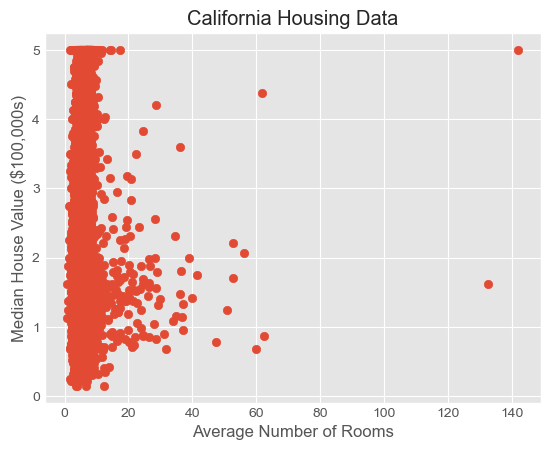

In [18]:
# Data overview

# Target variable: Median house value
y = california_housing.target.reshape(-1, 1)

# Feature: Average number of rooms
X = california_housing.data[:, 2].reshape(-1, 1)

# Plot the variables
plt.scatter(X, y)
plt.ylabel('Median House Value ($100,000s)')
plt.xlabel('Average Number of Rooms')
plt.title('California Housing Data')
plt.grid(True)
plt.show()

### Data prepration

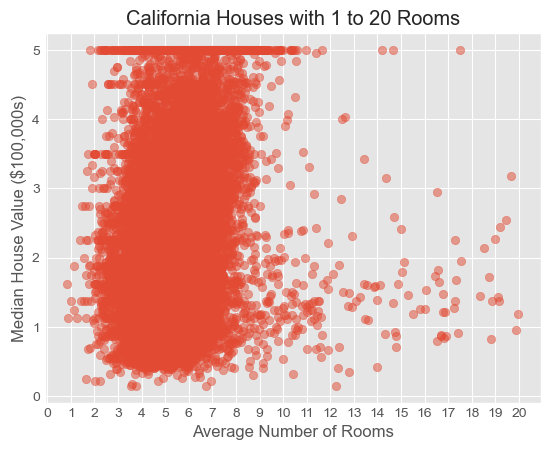

In [19]:
# We'll name the full arrays with an "_all" suffix for clarity
X_all = california_housing.data[:, 2].reshape(-1, 1)
y_all = california_housing.target.reshape(-1, 1)

# Create a boolean mask to find rooms between 0 and 10
# The condition (X_all > 0) & (X_all < 10) creates a True/False array.
mask = (X_all > 0) & (X_all < 20)

# The mask is a 2D array like [[True], [False], ...]. We flatten it to 1D to easily select rows.
mask_1d = mask.flatten()

# Apply the mask to both your features (X) and your target (y)
# This selects only the rows where the mask is True.
X_filtered = X_all[mask_1d]
y_filtered = y_all[mask_1d]

# Determine the range for our ticks based on the new filtered data
min_val = np.floor(X_filtered.min())
max_val = np.ceil(X_filtered.max())
custom_ticks = np.arange(min_val, max_val + 1, 1)

# Plot the variables
plt.scatter(X_filtered, y_filtered, alpha=0.5)
plt.ylabel('Median House Value ($100,000s)')
plt.xlabel('Average Number of Rooms')
plt.title('California Houses with 1 to 20 Rooms') # Updated title
plt.grid(True)

# Apply our custom ticks to the plot's x-axis
plt.xticks(custom_ticks)

plt.show()

### Model training and evaluation 

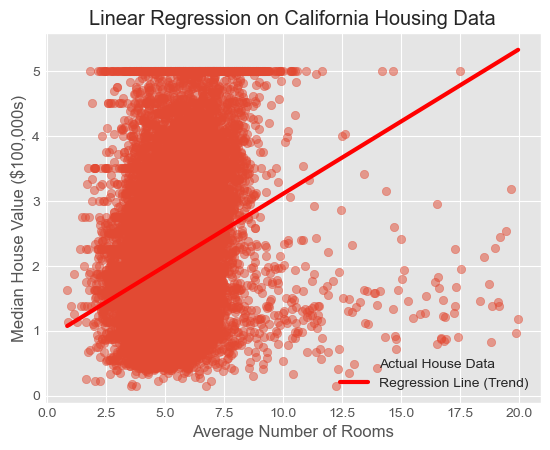

Model Slope (Coefficient): 0.22
Model Intercept: 0.88
R-squared score: 0.08

This means the model equation is roughly: Price = 0.22 * (Num Rooms) + 0.88
The R-squared of 0.08 means that ~8% of the variation in house price is explained by the number of rooms alone.
An R-squared value represents the proportion of the variance 
in the dependent variable (house price) that is predictable 
from the independent variable (rooms).

The R-squared of 0.08 means that your model can explain about 8% of the variation in house prices.
The other 92% is due to other factors not included in the model.

--- Model Strength Analysis ---
The relationship is very weak. The number of rooms is a poor predictor of price on its own.


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_filtered, y_filtered)

# 3. Create a smooth line of X values for plotting the regression line
#    We create 100 points from the minimum to maximum room number
X_line = np.linspace(X_filtered.min(), X_filtered.max(), 100).reshape(-1, 1)

# 4. Ask the trained model to predict the y values for our smooth X_line
y_line = model.predict(X_line)

# --- END: LINEAR REGRESSION ---


# --- PLOTTING ---
# Plot the original data points
plt.scatter(X_filtered, y_filtered, alpha=0.5, label='Actual House Data')

# Plot the regression line
plt.plot(X_line, y_line, color='red', linewidth=3, label='Regression Line (Trend)')

# --- Finalizing the Plot ---
plt.title('Linear Regression on California Housing Data')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value ($100,000s)')
plt.legend() # Display the labels for the scatter plot and the line
plt.grid(True)
plt.show()


# --- (Optional) Analyze the Model ---
# The slope of the line (how much the price increases per room)
slope = model.coef_[0][0]
# The y-intercept (the theoretical starting price for 0 rooms)
intercept = model.intercept_[0]
# The R-squared score (how much of the price variation is explained by rooms)
r_squared = model.score(X_filtered, y_filtered)

print(f"Model Slope (Coefficient): {slope:.2f}")
print(f"Model Intercept: {intercept:.2f}")
print(f"R-squared score: {r_squared:.2f}")
print(f"\nThis means the model equation is roughly: Price = {slope:.2f} * (Num Rooms) + {intercept:.2f}")
print(f"The R-squared of {r_squared:.2f} means that ~{r_squared*100:.0f}% of the variation in house price is explained by the number of rooms alone.")


# Use triple quotes for multi-line strings for better readability.
print("""An R-squared value represents the proportion of the variance 
in the dependent variable (house price) that is predictable 
from the independent variable (rooms).""")

# Use f-strings to perform calculations and format the output as percentages.
print(f"\nThe R-squared of {r_squared:.2f} means that your model can explain about {r_squared * 100:.0f}% of the variation in house prices.")
print(f"The other {100 - (r_squared * 100):.0f}% is due to other factors not included in the model.")

print("\n--- Model Strength Analysis ---")
if r_squared < 0.30:
    print("The relationship is very weak. The number of rooms is a poor predictor of price on its own.")
elif r_squared < 0.60:
    print("The relationship is moderate. The number of rooms is a decent predictor, but other factors are also very important.")
else:
    print("The relationship is relatively strong for a single-variable model.")

### Functions & Model Documentation

#### Functions

##### 1. `numpy.linspace()`

This function is part of the NumPy library and is used to create an array of evenly spaced numbers over a specified interval.

* **Purpose:** To generate a sequence of numbers for creating smooth lines or axes.
* **Syntax:** `numpy.linspace(start, stop, num=50)`

###### Parameters

| Parameter | Type              | Description                                                      |
| :-------- | :---------------- | :--------------------------------------------------------------- |
| `start`   | `float` or `int`  | **Required.** The starting value of the sequence.                |
| `stop`    | `float` or `int`  | **Required.** The ending value of the sequence.                  |
| `num`     | `int`             | **Optional.** The number of samples to generate. Defaults to `50`. |

###### Output (Returns)

* **Type:** `numpy.ndarray`
* **Description:** A new 1D NumPy array containing `num` evenly spaced values from `start` to `stop`.

##### Example from Our Code

X_line = np.linspace(X.min(), X.max(), 100)

##### 2. `ndarray.reshape()`

This is a method that belongs to a NumPy array (`ndarray`) object. It is used to change the shape (i.e., the number of rows and columns) of an array without changing its data.

* **Purpose:** To change the dimensions of an array, often to make it compatible with machine learning library requirements.
* **Syntax:** `my_array.reshape(newshape)`

###### Parameters

| Parameter  | Type                   | Description                                                                                                                                              |
| :--------- | :--------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `newshape` | `int` or `tuple of ints` | **Required.** The new shape the array should have. You can use `-1` for one of the dimensions, and NumPy will automatically calculate what it should be based on the array's size. |

###### Output (Returns)

* **Type:** `numpy.ndarray`
* **Description:** A new array with the same data as the original but with the specified `newshape`.

###### Example from Our Code

X_all = california_housing.data[:, 2].reshape(-1, 1)


##### 4. `matplotlib.pyplot.plot()`

This function, usually accessed via `plt.plot()`, is the primary function from the Matplotlib library for plotting lines and markers.

* **Purpose:** To draw a line or markers on the current figure.
* **Syntax:** `matplotlib.pyplot.plot(x, y, ...)`

###### Parameters

| Parameter   | Type              | Description                                                                                    |
| :---------- | :---------------- | :--------------------------------------------------------------------------------------------- |
| `x`         | array-like        | **Required.** The horizontal coordinates of the data points (the x-axis values).               |
| `y`         | array-like        | **Required.** The vertical coordinates of the data points (the y-axis values).               |
| `color`     | `str`             | **Optional.** A string specifying the color of the line (e.g., `'red'`, `'blue'`, `'g'`). |
| `linewidth` | `float` or `int`  | **Optional.** A number specifying the thickness of the line.                                     |
| `label`     | `str`             | **Optional.** A string used to identify the line in the plot's legend (when `plt.legend()` is called). |

###### Output (Returns)

* **Type:** `list` of `Line2D` objects.
* **Description:** While the function does return a list of line objects, we typically don't assign it to a variable. We call it for its **side effect**: drawing a line on our plot.

###### Example from Our Code

plt.plot(X_line, y_line, color='red', linewidth=3, label='Regression Line (Trend)')

#### sklearn.linear_model.LinearRegression() Model 

An object that fits a standard Ordinary Least Squares linear regression model. It finds the best-fit linear equation to describe the relationship between your features (X) and target (y).

---

##### Initialization Parameters

These are the arguments you can provide when you first create the model instance.

**Example:** `model = LinearRegression(fit_intercept=True)`

| Parameter         | Type    | Default | Description                                                                                                                                                             |
| :---------------- | :------ | :------ | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `fit_intercept`   | `bool`  | `True`  | If `True`, the model will calculate the y-intercept ('b' in $y = mx + b$). If `False`, the line is forced to pass through the origin (0,0).                                  |
| `positive`        | `bool`  | `False` | If `True`, the model forces the coefficients (the slope 'm') to be positive numbers. This is useful when you know the relationship must be positive.                       |
| `copy_X`          | `bool`  | `True`  | If `True`, the input data `X` will be copied before fitting. If `False`, `X` may be overwritten.                                                                          |
| `n_jobs`          | `int`   | `None`  | The number of jobs to use for computation. `None` means 1, `-1` means using all available processors. Useful for large datasets.                                          |

---

##### Attributes (available after fitting)

These are values stored in the model object that you can access *after* you have trained it using the `.fit()` method.

| Attribute         | Type             | Description                                                                                                              |
| :---------------- | :--------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `coef_`           | `array`          | The estimated coefficient(s) for the linear regression problem. This is the slope **'m'** in the equation $y = mx + b$. If there are multiple features, it's an array of slopes. |
| `intercept_`      | `float` or `array` | The y-intercept of the regression line. This is the **'b'** in the equation $y = mx + b$.                                                                                     |
| `n_features_in_`  | `int`            | The number of features the model saw during the `.fit()` call.                                                                                                            |
| `feature_names_in_`| `array`          | The names of the features seen during the `.fit()` call (if the input was a Pandas DataFrame).                                                                            |

---

##### Key Methods (Built-in Functions)

These are the actions you can perform with the model object.

###### `.fit(X, y)`
This is the most important method. It trains the linear regression model.

* **Purpose:** To "learn" the best `coef_` and `intercept_` from your training data.
* **Parameters:**
    * `X`: The training data (features). Must be a 2D array-like structure (e.g., shape `(n_samples, n_features)`).
    * `y`: The target values (the correct answers). Must be a 1D or 2D array-like structure (e.g., shape `(n_samples,)`).
* **Returns:** The fitted model instance (`self`), so you can chain commands like `model.fit(X,y).predict(X)`.

**Example:** `model.fit(X, y)`

###### `.predict(X)`
Uses the trained model to make predictions on new, unseen data.

* **Purpose:** To predict the target value for a given set of features.
* **Parameters:**
    * `X`: The data for which to make predictions. Must have the same number of features as the training data.
* **Returns:** A NumPy array containing the predicted target values.

**Example:** `y_line = model.predict(X_line)`

###### `.score(X, y)`
Evaluates the model's performance and returns the coefficient of determination, R² (R-squared).

* **Purpose:** To measure how well the model explains the variation in the data.
* **Parameters:**
    * `X`: The test data (features).
    * `y`: The true target values for the test data `X`.
* **Returns:** A `float` representing the R² score (a value between -∞ and 1.0, where 1.0 is a perfect fit).

**Example:** `r_squared = model.score(X, y)`

## logistic regression

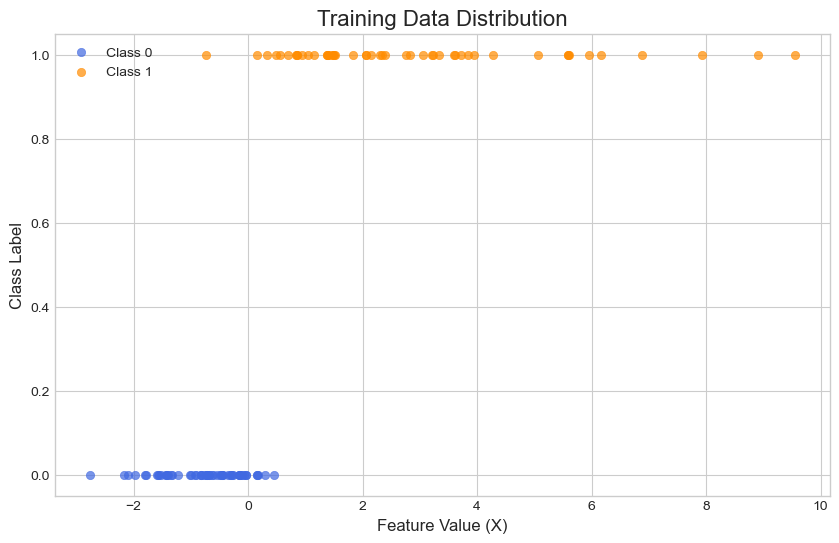

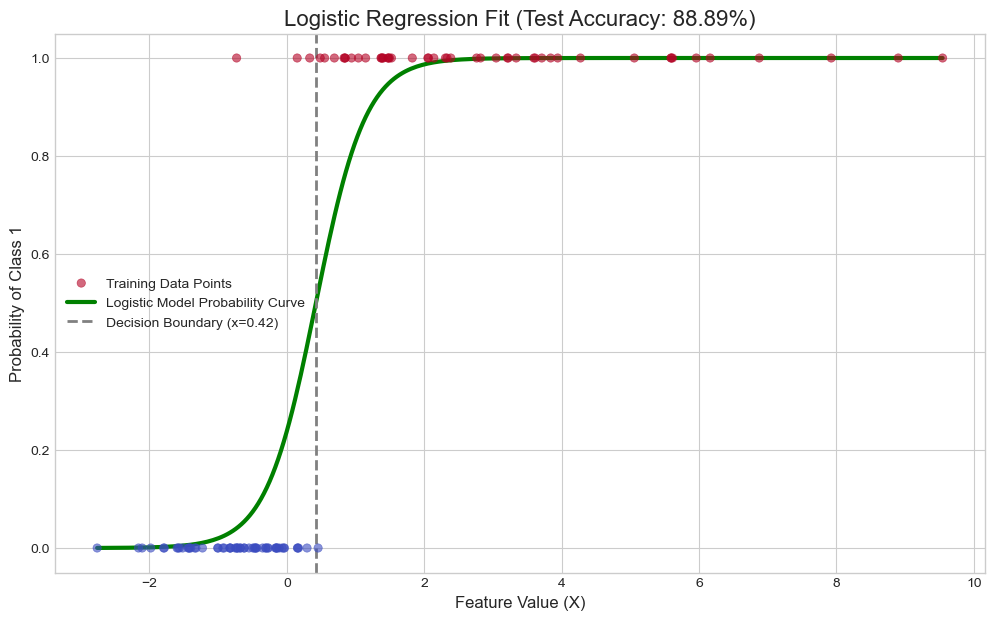

           Model Performance on Test Set              
Accuracy: 88.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.95      0.82      0.88        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Confusion Matrix:
[[22  1]
 [ 4 18]]


In [21]:
# =============================================================================
# IMPORTS AND STYLING
# =============================================================================
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Use a professional plot style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 1: DATASET GENERATION
# =============================================================================
# Set a seed for reproducibility, so the random data is the same every time.
np.random.seed(42)

# Generate some random data for the feature X
X = np.random.normal(size=150)

# Create the binary target variable y based on the initial state of X
y = (X > 0).astype(int)

# Introduce some separation and noise into X *after* creating y
X[X > 0] *= 4
X += .3 * np.random.normal(size=150)
X = X.reshape(-1, 1)

# --- Best Practice: Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# =============================================================================
# STEP 2: PLOT INITIAL DATA
# =============================================================================
# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot each class with a different color for clarity
plt.scatter(X_train[y_train == 0], y_train[y_train == 0], c='royalblue', alpha=0.7, label='Class 0')
plt.scatter(X_train[y_train == 1], y_train[y_train == 1], c='darkorange', alpha=0.7, label='Class 1')

plt.title('Training Data Distribution', fontsize=16)
plt.ylabel('Class Label', fontsize=12)
plt.xlabel('Feature Value (X)', fontsize=12)
plt.legend()
plt.show()


# =============================================================================
# STEP 3: LOGISTIC REGRESSION ANALYSIS
# =============================================================================
# Initialize and fit the model ON THE TRAINING DATA
model = LogisticRegression()
model.fit(X_train, y_train)


# =============================================================================
# STEP 4: VISUALIZE THE MODEL AND EVALUATE
# =============================================================================
# Create a figure for the plot
plt.figure(figsize=(12, 7))

# Plot the original training data points again
plt.scatter(X_train.ravel(), y_train, c=y_train, cmap='coolwarm', zorder=20, alpha=0.6, label='Training Data Points')

# Create a smooth line of X values to plot the probability curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_proba = model.predict_proba(X_range)[:, 1]
plt.plot(X_range, y_proba, color='green', linewidth=3, label='Logistic Model Probability Curve')

# --- Add Decision Boundary ---
# The boundary is where the probability is 0.5
decision_boundary = -model.intercept_[0] / model.coef_[0][0]
plt.axvline(x=decision_boundary, color='grey', linestyle='--', linewidth=2, label=f'Decision Boundary (x={decision_boundary:.2f})')

# --- Add Accuracy to Title ---
y_pred_test = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
plt.title(f'Logistic Regression Fit (Test Accuracy: {accuracy:.2%})', fontsize=16)

plt.ylabel('Probability of Class 1', fontsize=12)
plt.xlabel('Feature Value (X)', fontsize=12)
plt.legend(loc='center left')
plt.show()


# =============================================================================
# STEP 5: DETAILED PERFORMANCE METRICS
# =============================================================================
print("======================================================")
print("           Model Performance on Test Set              ")
print("======================================================")
print(f"Accuracy: {accuracy:.2%}\n")

# Print the detailed classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_test))

# Print the confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_test))
print("======================================================")

## Quantile Regression

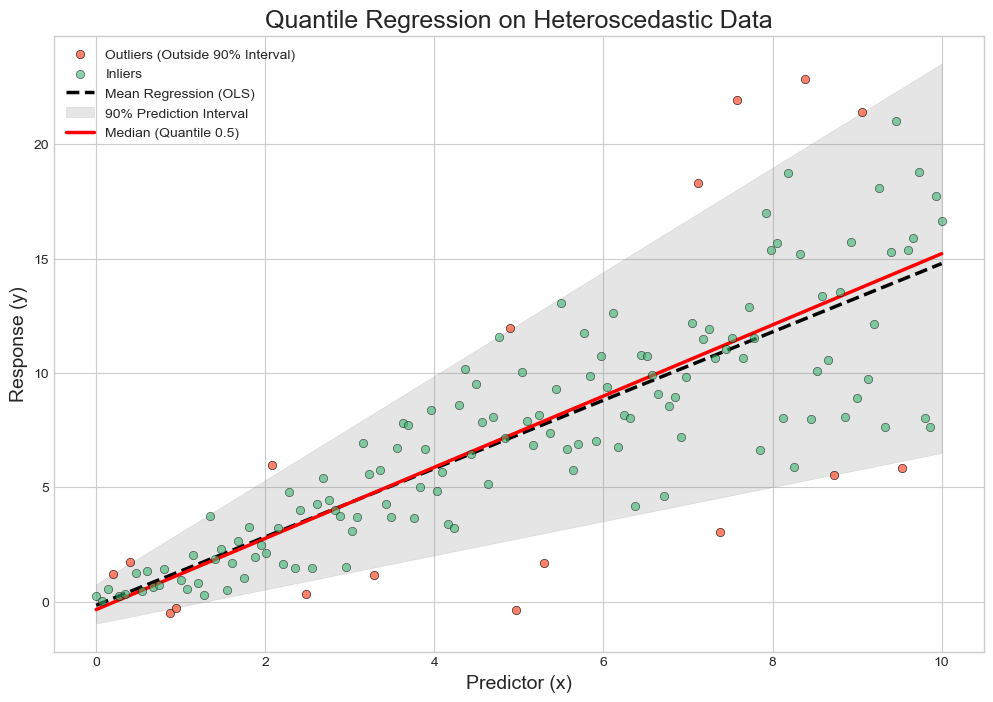

In [22]:
# =============================================================================
# STEP 1: IMPORTS AND STYLING
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')

# =============================================================================
# STEP 2: DATASET GENERATION
# =============================================================================
# Set a seed for reproducible random numbers
np.random.seed(42)

# --- IMPROVEMENT: Create a heteroscedastic dataset ---
# This is a dataset where the variance of y increases as x increases.
# This makes the data cloud "fan out" and is a perfect use-case for quantile regression.
num_points = 150
x = np.linspace(0, 10, num_points)
# The noise term's standard deviation (the spread) grows with x
noise = np.random.normal(loc=0, scale=0.5 + 0.5 * x, size=num_points)
y = 1.5 * x + noise

df = pd.DataFrame({'x': x, 'y': y})


# =============================================================================
# STEP 3: MODEL FITTING
# =============================================================================
# This structure remains the same.

# Develop a linear regression model (OLS) for comparison
ols_fit = np.polyfit(df['x'], df['y'], deg=1)

# Develop the quantile regression models
model = smf.quantreg('y ~ x', df)
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
fits = {q: model.fit(q=q) for q in quantiles}


# =============================================================================
# STEP 4: CREATE THE OUTLIER MASK
# =============================================================================
# This structure remains the same.

# Predict the y-values for the outer quantiles at each x
y_pred_005 = fits[0.05].predict(df)
y_pred_095 = fits[0.95].predict(df)

# A point is an "outlier" if it's outside the 90% prediction interval
mask = (df['y'] < y_pred_005) | (df['y'] > y_pred_095)


# =============================================================================
# STEP 5: PLOTTING
# =============================================================================
# Create a figure and axes for the plot
fig, axes = plt.subplots(figsize=(12, 8))

# Plot the outliers and inliers
axes.scatter(df['x'][mask], df['y'][mask], facecolor='tomato', edgecolor='k',
             alpha=0.8, label='Outliers (Outside 90% Interval)', zorder=10)
axes.scatter(df['x'][~mask], df['y'][~mask], facecolor='mediumseagreen', edgecolor='k',
             alpha=0.6, label='Inliers', zorder=10)

# --- IMPROVEMENT: Enhanced line and interval plotting ---
x_line = np.linspace(df['x'].min(), df['x'].max(), num=num_points)

# Plot the standard OLS regression line
axes.plot(x_line, ols_fit[0] * x_line + ols_fit[1], label='Mean Regression (OLS)', c='black',
          linestyle='--', linewidth=2.5)

# Get lines for the outer quantiles for shading
y_line_005 = fits[0.05].params['x'] * x_line + fits[0.05].params['Intercept']
y_line_095 = fits[0.95].params['x'] * x_line + fits[0.95].params['Intercept']

# Shade the area between the outer quantiles (the 90% prediction interval)
axes.fill_between(x_line, y_line_005, y_line_095, color='gray', alpha=0.2, label='90% Prediction Interval')

# Plot the median quantile line separately to make it stand out
y_line_050 = fits[0.5].params['x'] * x_line + fits[0.5].params['Intercept']
axes.plot(x_line, y_line_050, label=f'Median (Quantile 0.5)', c='red', linestyle='-', linewidth=2.5)

# --- Final Touches ---
axes.legend(loc='upper left')
axes.set_title('Quantile Regression on Heteroscedastic Data', fontsize=18)
axes.set_xlabel('Predictor (x)', fontsize=14)
axes.set_ylabel('Response (y)', fontsize=14)
plt.show()

## The Ridge and Lasso regression approaches

In [ ]:
# =============================================================================
# STEP 1: IMPORTS AND SETUP
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ElasticNetCV is the hybrid model that combines L1 and L2 penalties
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 2: LOAD AND PREPARE DATA
# =============================================================================
try:
    data = pd.read_csv('.csv')
except FileNotFoundError:
    print("Error: '.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Drop non-numerical/unnecessary columns
data = data.drop([''], axis=1)

# Define features (X) and target (y)
y = data['']
X = data.drop('', axis=1)

# Get feature names for later plotting
feature_names = X.columns


# =============================================================================
# STEP 3: SPLIT AND SCALE DATA
# =============================================================================
# Split data into training and testing sets for valid evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data: crucial for regularized models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# =============================================================================
# STEP 4: FIT AND EVALUATE MODELS
# =============================================================================
# --- Baseline: Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# --- Ridge Regression (L2) ---
# RidgeCV finds the best alpha from a list using cross-validation
alphas_ridge = [0.1, 1, 10, 100, 200]
ridge_cv_model = RidgeCV(alphas=alphas_ridge)
ridge_cv_model.fit(X_train_scaled, y_train)

# --- Lasso Regression (L1) ---
# LassoCV finds the best alpha from a list using cross-validation
alphas_lasso = [1, 10, 100, 500, 1000]
lasso_cv_model = LassoCV(alphas=alphas_lasso, max_iter=10000, random_state=42)
lasso_cv_model.fit(X_train_scaled, y_train)

# --- IMPROVEMENT: ElasticNet Regression (L1 + L2) ---
# ElasticNetCV finds the best alpha AND the best l1_ratio
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
elastic_cv_model = ElasticNetCV(alphas=alphas_lasso, l1_ratio=l1_ratios, max_iter=10000, random_state=42)
elastic_cv_model.fit(X_train_scaled, y_train)


# =============================================================================
# STEP 5: COMPARE MODEL PERFORMANCE AND COEFFICIENTS
# =============================================================================
# --- Create a DataFrame for R-squared scores ---
scores = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet'],
    'R² Score on Test Set': [
        linear_model.score(X_test_scaled, y_test),
        ridge_cv_model.score(X_test_scaled, y_test),
        lasso_cv_model.score(X_test_scaled, y_test),
        elastic_cv_model.score(X_test_scaled, y_test)
    ],
    'Optimal Alpha': ['N/A', ridge_cv_model.alpha_, lasso_cv_model.alpha_, elastic_cv_model.alpha_],
    'Optimal L1 Ratio': ['N/A', 'N/A', 'N/A', elastic_cv_model.l1_ratio_]
}
score_df = pd.DataFrame(scores)
print("--- Model Performance Comparison ---")
print(score_df.to_string(index=False))


# --- IMPROVEMENT: Create a DataFrame for model coefficients ---
coefficients = {
    'Feature': feature_names,
    'Linear': linear_model.coef_,
    'Ridge': ridge_cv_model.coef_,
    'Lasso': lasso_cv_model.coef_,
    'ElasticNet': elastic_cv_model.coef_
}
coef_df = pd.DataFrame(coefficients).set_index('Feature')

# --- IMPROVEMENT: Visualize the coefficients ---
print("\n--- Visualizing Model Coefficients ---")
ax = coef_df.plot(kind='bar', figsize=(15, 8),
                  title='Comparison of Model Coefficients',
                  grid=True)
ax.set_ylabel('Coefficient Value')
ax.axhline(0, color='black', linewidth=0.5) # Add a line at y=0 for reference
plt.show()

print("\n--- Coefficient Analysis ---")
print("Notice how Lasso Regression forces many coefficients to exactly zero, effectively performing feature selection.")
print("Ridge Regression shrinks all coefficients towards zero but rarely makes them exactly zero.")
print(coef_df)

## Examples

### Linear regression analysis implementation

Training set size: 353 samples
Testing set size: 89 samples

Training the model...
Model training complete.

           Model Evaluation Results             
Learned Equation: y = 998.58 * x + 152.00
Mean Squared Error (MSE): 4061.83
R-squared (R²) Score: 0.2334

* R-squared explains the proportion of variance in the target that is predictable from the feature.
* An R² of 0.23 means that ~23% of the variance in disease progression can be explained by BMI alone.


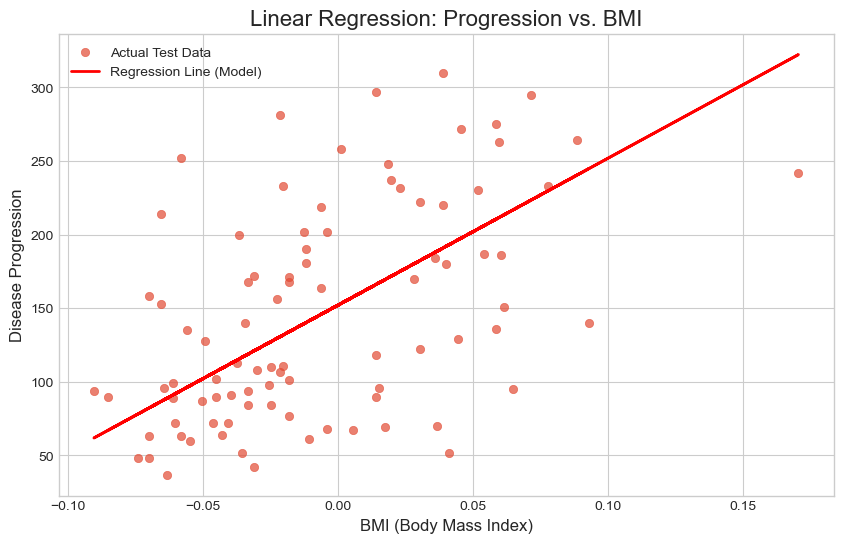

In [23]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =============================================================================
# STEP 1: LOAD THE DATASET AND CREATE DATAFRAME
# =============================================================================
# Load the dataset
diabetes_bunch = datasets.load_diabetes()

# Create a pandas DataFrame
df = pd.DataFrame(diabetes_bunch.data, columns=diabetes_bunch.feature_names)
df['progression'] = diabetes_bunch.target

'''
# =============================================================================
# (Optional) STEP 2: DISPLAY DATA AND DESCRIPTIONS
# =============================================================================
# Display the first 5 rows
print("--- Head of the Diabetes DataFrame ---")
print(df.head())

# Print the feature descriptions
print("\n--- Feature Descriptions ---")
print("""
- age:        Age in years
- sex:        Patient's sex
- bmi:        Body Mass Index
- bp:         Average blood pressure
- s1 (tc):    Total Serum Cholesterol
- s2 (ldl):   Low-Density Lipoproteins
- s3 (hdl):   High-Density Lipoproteins
- s4 (tch):   Total Cholesterol / HDL ratio
- s5 (ltg):   Log of Serum Triglycerides level
- s6 (glu):   Blood Sugar Level
- progression: The target variable.
""")


# =============================================================================
# STEP 3: PLOT EACH FEATURE AGAINST THE TARGET
# =============================================================================
# Get the list of feature names
feature_names = diabetes_bunch.feature_names

# Create a 2x5 grid of subplots
# figsize is adjusted to make the plots readable
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Add a main title for the entire figure
fig.suptitle('Relationship between Each Feature and Disease Progression (Target)', fontsize=16)

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through each feature and plot it against the target on a separate subplot
for i, feature in enumerate(feature_names):
    ax = axes[i]
    ax.scatter(df[feature], df['progression'], alpha=0.6)
    ax.set_title(f'progression vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('progression')
    ax.grid(True)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()
'''

# =============================================================================
# STEP 4: Select variables
# =============================================================================

# Select the independent variable (X) and the dependent variable (y)
# X needs to be a 2D array for scikit-learn, so we reshape it.
X = df[['bmi']].values # Using .values gives us a NumPy array
y = df['progression'].values


# =============================================================================
# STEP 5: TRAIN-TEST SPLIT
# =============================================================================
# Divide the data into training (80%) and testing (20%) sets.
# random_state ensures that we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


# =============================================================================
# STEP 6: TRAIN THE LINEAR REGRESSION MODEL
# =============================================================================
# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
print("\nTraining the model...")
model.fit(X_train, y_train)
print("Model training complete.")


# =============================================================================
# STEP 7: TEST AND EVALUATE THE MODEL
# =============================================================================
# Use the trained model to make predictions on the unseen test data
y_pred = model.predict(X_test)

# --- Numerical Evaluation ---
# Get the model's learned parameters (the equation of the line)
slope = model.coef_[0]
intercept = model.intercept_

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("           Model Evaluation Results             ")
print("="*50)
print(f"Learned Equation: y = {slope:.2f} * x + {intercept:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print("="*50)
print("\n* R-squared explains the proportion of variance in the target that is predictable from the feature.")
print(f"* An R² of {r2:.2f} means that ~{r2*100:.0f}% of the variance in disease progression can be explained by BMI alone.")


# =============================================================================
# STEP 8: VISUALIZE THE RESULTS
# =============================================================================
plt.figure(figsize=(10, 6))

# Scatter plot of the actual test data
plt.scatter(X_test, y_test, alpha=0.7, label='Actual Test Data')

# Plot the regression line (our model's predictions)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Model)')

# Finalizing the plot
plt.title('Linear Regression: Progression vs. BMI', fontsize=16)
plt.xlabel('BMI (Body Mass Index)', fontsize=12)
plt.ylabel('Disease Progression', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


  Running 10-Fold Cross-Validation for 'bmi'  
R² Scores for each fold: [0.319 0.002 0.225 0.464 0.196 0.503 0.28  0.299 0.309 0.428]

Average R² Score: 0.3024
Standard Deviation of R² Scores: 0.1381

  Running Single Train-Test Split Analysis for 'bmi'  
Training set size: 353 samples
Testing set size: 89 samples

--- Evaluation Results ---
Mean Squared Error (MSE): 4061.83
R-squared (R²) Score: 0.2334


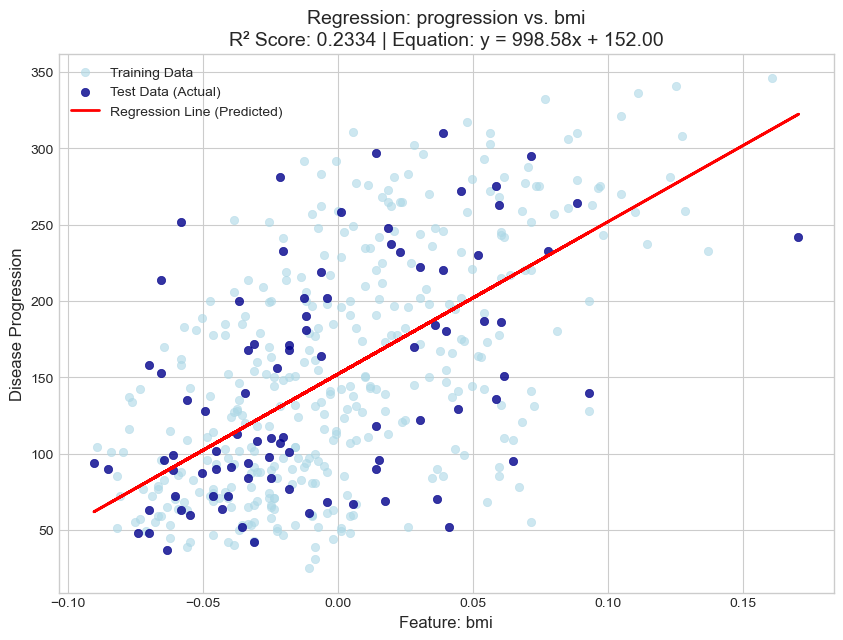

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_diabetes_data():
    """Loads the diabetes dataset and returns it as a pandas DataFrame."""
    diabetes_bunch = datasets.load_diabetes()
    df = pd.DataFrame(diabetes_bunch.data, columns=diabetes_bunch.feature_names)
    df['progression'] = diabetes_bunch.target
    return df

def plot_regression_results(X_train, y_train, X_test, y_test, y_pred, model, feature_name, r2):
    """Visualizes the regression results, showing train/test data and the model's fit."""
    plt.figure(figsize=(10, 7))
    
    # Plot training data in a light color
    plt.scatter(X_train, y_train, color='lightblue', alpha=0.6, label='Training Data')
    # Plot test data in a darker color
    plt.scatter(X_test, y_test, color='darkblue', alpha=0.8, label='Test Data (Actual)')
    
    # Plot the regression line
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Predicted)')
    
    # Add model equation and R-squared to the title
    slope = model.coef_[0]
    intercept = model.intercept_
    title = (f'Regression: progression vs. {feature_name}\n'
             f'R² Score: {r2:.4f} | Equation: y = {slope:.2f}x + {intercept:.2f}')
             
    plt.title(title, fontsize=14)
    plt.xlabel(f'Feature: {feature_name}', fontsize=12)
    plt.ylabel('Disease Progression', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def perform_single_split_analysis(df, feature_name, target_name='progression', test_size=0.2, random_state=42):
    """Performs a full train-test-evaluate cycle for a given feature."""
    print("\n" + "="*50)
    print(f"  Running Single Train-Test Split Analysis for '{feature_name}'  ")
    print("="*50)
    
    X = df[[feature_name]].values
    y = df[target_name].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n--- Evaluation Results ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²) Score: {r2:.4f}")
    
    # Generate the plot
    plot_regression_results(X_train, y_train, X_test, y_test, y_pred, model, feature_name, r2)
    
    return model, r2

def evaluate_with_cross_validation(df, feature_name, target_name='progression', cv_folds=10):
    """Evaluates a model using K-Fold cross-validation for a more robust score."""
    print("\n" + "="*50)
    print(f"  Running {cv_folds}-Fold Cross-Validation for '{feature_name}'  ")
    print("="*50)

    X = df[[feature_name]].values
    y = df[target_name].values
    
    model = LinearRegression()
    
    # cross_val_score returns an array of scores, one for each fold
    scores = cross_val_score(model, X, y, cv=cv_folds, scoring='r2')
    
    print(f"R² Scores for each fold: {np.round(scores, 3)}")
    print(f"\nAverage R² Score: {scores.mean():.4f}")
    print(f"Standard Deviation of R² Scores: {scores.std():.4f}")
    print("="*50)

# =============================================================================
# MAIN EXECUTION BLOCK
# =============================================================================
if __name__ == "__main__":
    # Load the data once at the start
    diabetes_df = load_diabetes_data()
    
    # Define which feature to analyze. You can easily change this!
    feature_to_analyze = 'bmi'
    
    # 1. Get a robust performance estimate using cross-validation
    evaluate_with_cross_validation(diabetes_df, feature_to_analyze)
    
    # 2. Perform a detailed analysis on a single split for visualization
    perform_single_split_analysis(diabetes_df, feature_to_analyze)

### Logistic regression analysis implementation


  Running 5-Fold Cross-Validation  
Accuracy scores for each fold: [1.   0.95 1.   0.9  0.9 ]

Average Accuracy: 95.00%
Standard Deviation of Accuracy: 0.0447

  Running Single Train-Test Split Analysis  
Training set size: 70 samples
Testing set size: 30 samples

--- Evaluation Results on Test Set ---
Accuracy: 93.33%

Confusion Matrix:
[[16  0]
 [ 2 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



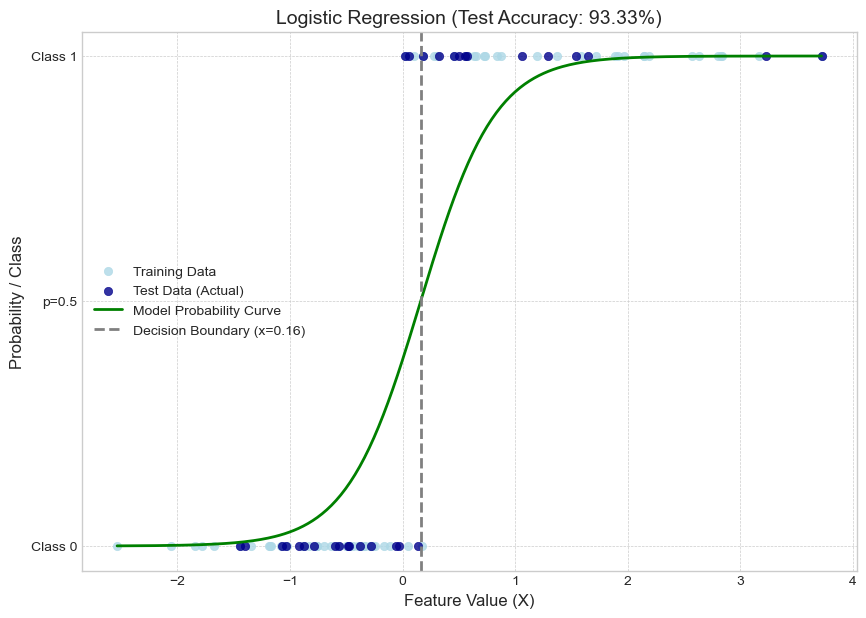

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')

def generate_logistic_data(n_samples=50, random_state=42):
    """Generates the sample dataset for logistic regression."""
    # Set the seed for reproducible random numbers
    np.random.seed(random_state)
    
    x = np.random.normal(size=n_samples)
    # Use 'int' for classification targets; np.float is deprecated
    y = (x > 0).astype(int)
    
    x[x > 0] *= 2
    x += .3 * np.random.normal(size=n_samples)
    x = x.reshape(-1, 1)
    
    return x, y

def plot_logistic_results(X_train, y_train, X_test, y_test, model, accuracy):
    """Visualizes the logistic regression results."""
    plt.figure(figsize=(10, 7))
    
    # Plot training and test data points
    plt.scatter(X_train, y_train, color='lightblue', alpha=0.8, label='Training Data')
    plt.scatter(X_test, y_test, color='darkblue', alpha=0.8, label='Test Data (Actual)')
    
    # Create a smooth range to plot the probability curve
    X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
    y_proba = model.predict_proba(X_range)[:, 1] # Probability of class 1
    
    # Plot the S-shaped probability curve
    plt.plot(X_range, y_proba, color='green', linewidth=2, label='Model Probability Curve')
    
    # Calculate and plot the decision boundary (where probability = 0.5)
    decision_boundary = -model.intercept_[0] / model.coef_[0][0]
    plt.axvline(x=decision_boundary, color='grey', linestyle='--', linewidth=2, 
                label=f'Decision Boundary (x={decision_boundary:.2f})')
    
    plt.title(f'Logistic Regression (Test Accuracy: {accuracy:.2%})', fontsize=14)
    plt.xlabel('Feature Value (X)', fontsize=12)
    plt.ylabel('Probability / Class', fontsize=12)
    plt.yticks([0, 0.5, 1], ['Class 0', 'p=0.5', 'Class 1'])
    plt.legend(loc='center left')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.show()

def perform_logistic_analysis(X, y, test_size=0.3, random_state=42):
    """Performs a full train-test-evaluate cycle for logistic regression."""
    print("\n" + "="*50)
    print("  Running Single Train-Test Split Analysis  ")
    print("="*50)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\n--- Evaluation Results on Test Set ---")
    print(f"Accuracy: {accuracy:.2%}\n")
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate the plot
    plot_logistic_results(X_train, y_train, X_test, y_test, model, accuracy)
    
    return model, accuracy

def evaluate_logistic_with_cv(X, y, cv_folds=5):
    """Evaluates a logistic model with K-Fold cross-validation for a robust score."""
    print("\n" + "="*50)
    print(f"  Running {cv_folds}-Fold Cross-Validation  ")
    print("="*50)

    model = LogisticRegression()
    
    # Use 'accuracy' as the scoring metric for classification
    scores = cross_val_score(model, X, y, cv=cv_folds, scoring='accuracy')
    
    print(f"Accuracy scores for each fold: {np.round(scores, 3)}")
    print(f"\nAverage Accuracy: {scores.mean():.2%}")
    print(f"Standard Deviation of Accuracy: {scores.std():.4f}")
    print("="*50)

# =============================================================================
# MAIN EXECUTION BLOCK
# =============================================================================
if __name__ == "__main__":
    # 1. Generate the dataset
    X_data, y_data = generate_logistic_data(n_samples=100) # Increased samples for better demo
    
    # 2. Get a robust performance estimate using cross-validation
    evaluate_logistic_with_cv(X_data, y_data)
    
    # 3. Perform a detailed analysis on a single split for visualization and detailed reports
    perform_logistic_analysis(X_data, y_data)

### Quantile regression analysis implementation


  Running Quantile & OLS Regression Analysis  
OLS (Mean) Regression Model Fitted.
Fitted models for quantiles: [0.05, 0.25, 0.5, 0.75, 0.95]

--- Model Parameters ---
OLS Intercept: 9.745186896241556
OLS Slope: 0.48247381099632264

Quantile Model Parameters:
          Intercept  Slope (x)
Quantile                      
0.05       7.524546  -0.055254
0.25       9.517240   0.001799
0.50       9.967345   0.405861
0.75      10.809614   0.811765
0.95      10.938219   1.141497


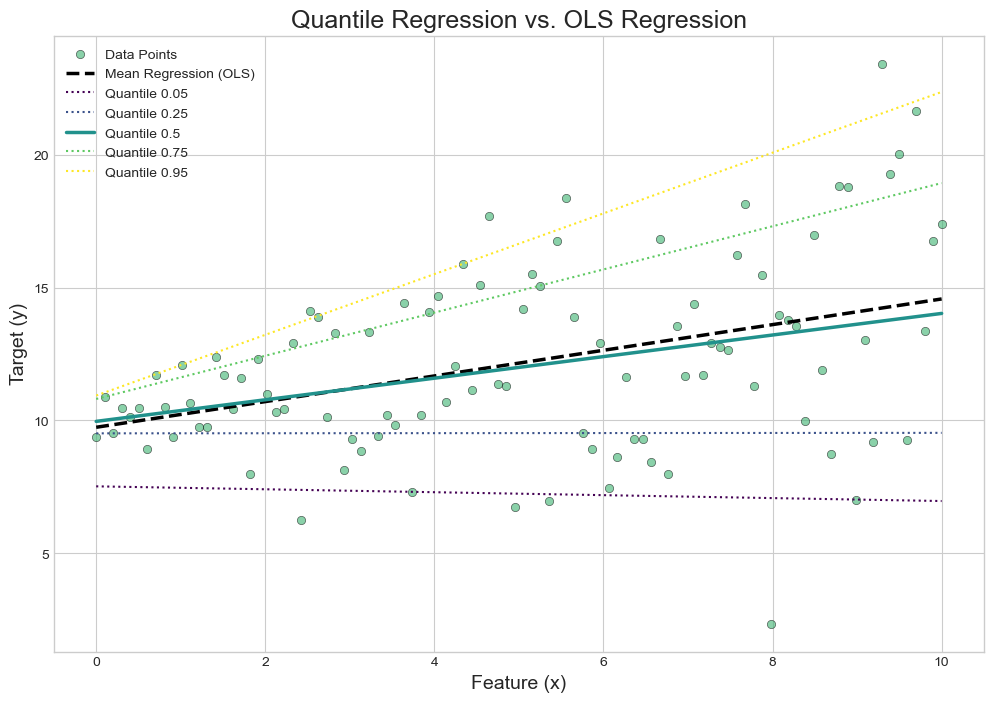

In [26]:
# =============================================================================
# STEP 1: IMPORTS AND SETUP
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 2: DATA GENERATION
# =============================================================================
def generate_heteroscedastic_data(n_samples=100, random_state=30):
    """
    Generates a dataset with non-constant variance (heteroscedasticity)
    to better demonstrate the power of Quantile Regression.
    """
    rng = np.random.RandomState(random_state)
    base = np.linspace(start=0, stop=10, num=n_samples)
    
    # Create the linear relationship
    y_true = 10 + 0.5 * base
    
    # Create noise that increases as 'base' increases
    noise = rng.normal(loc=0, scale=0.5 + 0.5 * base, size=n_samples)
    
    # Combine into a DataFrame
    df = pd.DataFrame({'x': base, 'y': y_true + noise})
    return df


# =============================================================================
# STEP 3: VISUALIZATION FUNCTION
# =============================================================================
def plot_quantile_results(df, ols_model, quant_models):
    """Visualizes the quantile regression results."""
    plt.figure(figsize=(12, 8))
    
    # Plot the raw data points
    plt.scatter(df['x'], df['y'], facecolor='mediumseagreen', edgecolor='k',
                alpha=0.6, label='Data Points')
    
    # Create a smooth line of x-values for plotting
    x_line = np.linspace(df['x'].min(), df['x'].max(), num=len(df))
    
    # Plot the OLS (mean) regression line
    y_ols_line = ols_model.predict(x_line[:, np.newaxis])
    plt.plot(x_line, y_ols_line, color='black', linestyle='--', linewidth=2.5,
             label='Mean Regression (OLS)')
             
    # Use a colormap for the quantile lines
    cmap = plt.get_cmap('viridis')
    quantiles = sorted(quant_models.keys())
    
    # Plot each quantile regression line
    for i, q in enumerate(quantiles):
        model = quant_models[q]
        y_quant_line = model.params['x'] * x_line + model.params['Intercept']
        color = cmap(i / (len(quantiles) - 1))
        lw = 2.5 if q == 0.5 else 1.5
        ls = '-' if q == 0.5 else ':'
        plt.plot(x_line, y_quant_line, color=color, linewidth=lw, linestyle=ls,
                 label=f'Quantile {q}')

    plt.title('Quantile Regression vs. OLS Regression', fontsize=18)
    plt.xlabel('Feature (x)', fontsize=14)
    plt.ylabel('Target (y)', fontsize=14)
    plt.legend(loc='upper left')
    plt.show()


# =============================================================================
# STEP 4: MAIN ANALYSIS FUNCTION
# =============================================================================
def perform_quantile_analysis(df, quantiles_to_run):
    """
    Performs a full quantile regression analysis for a list of quantiles
    and compares it against a standard OLS regression.
    """
    print("\n" + "="*50)
    print("  Running Quantile & OLS Regression Analysis  ")
    print("="*50)

    # --- Fit OLS Model (for comparison) ---
    ols_model = LinearRegression()
    ols_model.fit(df[['x']], df['y'])
    print("OLS (Mean) Regression Model Fitted.")
    
    # --- Fit Quantile Regression Models ---
    quant_models = {}
    results = []
    
    for q in quantiles_to_run:
        # The formula 'y ~ x' tells statsmodels to model y as a function of x
        model = smf.quantreg('y ~ x', df)
        fit = model.fit(q=q)
        quant_models[q] = fit
        results.append({'Quantile': q, 
                        'Intercept': fit.params['Intercept'], 
                        'Slope (x)': fit.params['x']})
    
    print(f"Fitted models for quantiles: {quantiles_to_run}")
    
    # --- Display Model Parameters ---
    results_df = pd.DataFrame(results).set_index('Quantile')
    print("\n--- Model Parameters ---")
    print("OLS Intercept:", ols_model.intercept_)
    print("OLS Slope:", ols_model.coef_[0])
    print("\nQuantile Model Parameters:")
    print(results_df)
    
    # --- Generate the plot ---
    plot_quantile_results(df, ols_model, quant_models)
    
    return ols_model, quant_models

# =============================================================================
# MAIN EXECUTION BLOCK
# =============================================================================
if __name__ == "__main__":
    # 1. Generate the dataset
    data_df = generate_heteroscedastic_data()
    
    # 2. Define the quantiles you want to model
    quantiles_to_analyze = [0.05, 0.25, 0.5, 0.75, 0.95]
    
    # 3. Perform the full analysis
    perform_quantile_analysis(data_df, quantiles_to_analyze)

# SUPPORT VECTOR MACHINES

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- 1. Data Loading and Preparation ---
"""
try:
    trialdata = pd.read_csv(".csv")
except FileNotFoundError:
    print("Error: '.csv' not found. Please check the file path.")
    exit()
"""
# Data structured as a dictionary
data = {
    'a': [4.3634, 3.482, 0.51947, 2.3164, -1.8348, -1.7279, -3.3793, -3.1273, -2.121, -1.7697],
    'b': [0.46351, -4.1634, -3.2633, -2.628, 11.0334, -6.841, -13.7731, -7.1121, -0.05588, 3.4329],
    'c': [1.4281, 3.5008, 3.0895, 3.1529, 3.1863, 8.9494, 17.9274, 11.3897, 1.949, -1.2144],
    'd': [2.0202, -0.07846, -0.98492, -0.08622, -4.8888, 0.68058, -2.0323, -0.08363, 1.353, -2.3789],
    'Class': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
# Create the pandas DataFrame
trialdata = pd.DataFrame(data)
x = trialdata.drop('Class', axis=1)
y = trialdata['Class']

# --- 2. Data Splitting (Done ONLY ONCE) ---
# This ensures all models are trained and tested on the exact same data.
# We set a random_state for reproducible results.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# --- 3. Re-defined Classification Function ---
# The function now receives the split data as arguments.
def classify_with_kernel(kernelName, X_train, X_test, y_train, y_test):
    """
    Trains and evaluates an SVM classifier with a given kernel.
    """
    # Define the classifier based on the kernel name
    if kernelName == 'poly':
        # Using a high degree like 8 can easily overfit, but we keep it as per your original code.
        svclassifier = SVC(kernel='poly', degree=8)
    else:
        svclassifier = SVC(kernel=kernelName)
    
    # Train the model
    svclassifier.fit(X_train, y_train)

    # Make predictions
    y_pred = svclassifier.predict(X_test)
    
    # Return the accuracy score
    return accuracy_score(y_test, y_pred)

# --- 4. Execute and Compare Kernels ---
print("\n--- Evaluating SVM Kernels on a Consistent Test Set ---")

linear_acc = classify_with_kernel('linear', x_train, x_test, y_train, y_test)
print(f"Linear Accuracy: {linear_acc}")

poly_acc = classify_with_kernel('poly', x_train, x_test, y_train, y_test)
print(f"Polynomial Accuracy: {poly_acc}")

# 'rbf' is the technical name for the Gaussian kernel in scikit-learn
rbf_acc = classify_with_kernel('rbf', x_train, x_test, y_train, y_test)
print(f"Gaussian (RBF) Accuracy: {rbf_acc}")

sigmoid_acc = classify_with_kernel('sigmoid', x_train, x_test, y_train, y_test)
print(f"Sigmoid Accuracy: {sigmoid_acc}")


--- Evaluating SVM Kernels on a Consistent Test Set ---
Linear Accuracy: 1.0
Polynomial Accuracy: 0.5
Gaussian (RBF) Accuracy: 0.5
Sigmoid Accuracy: 0.5


## Examples

### SVM classifier

           Model Performance on Test Set              

--- Polynomial Kernel SVM ---
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- RBF Kernel SVM ---
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



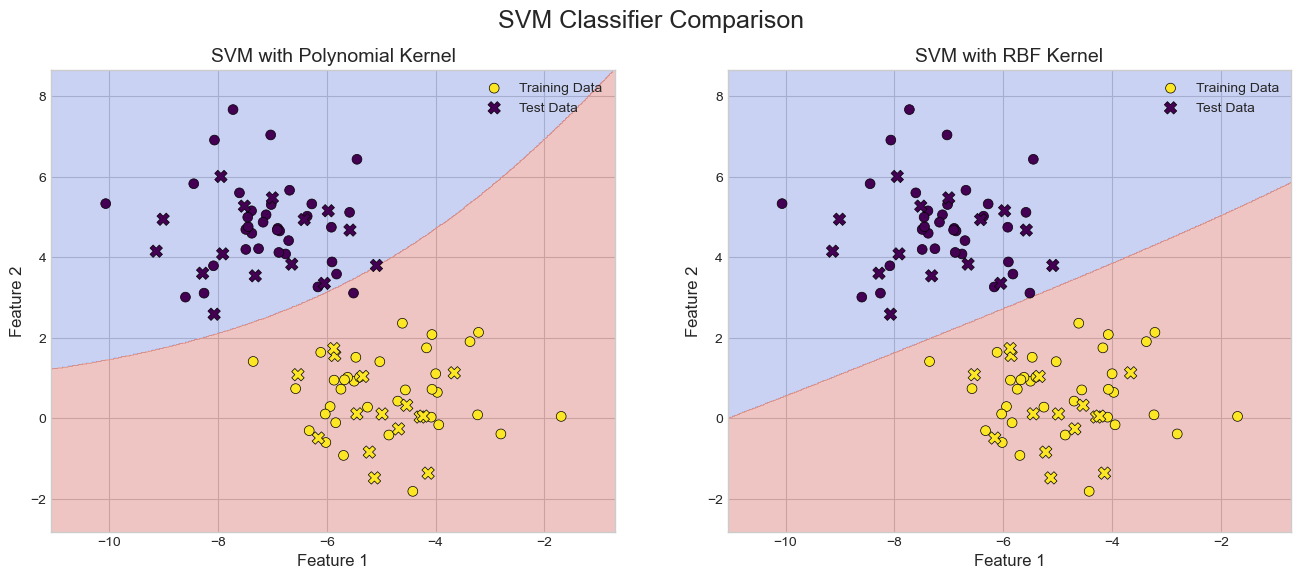

In [28]:
# =============================================================================
# STEP 1: IMPORT LIBRARIES
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC # "SVC" stands for Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 2: CREATE THE DATASET
# =============================================================================
X, y = make_blobs(n_samples=100, centers=2, random_state=12)


# =============================================================================
# NEW! STEP 3: SPLIT DATA INTO TRAINING AND TESTING SETS
# =============================================================================
# This is a critical step for model evaluation.
# We use random_state for reproducible results and stratify=y to maintain
# the same proportion of classes in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# =============================================================================
# STEP 4: TRAIN THE SVM MODELS (ON THE TRAINING DATA)
# =============================================================================
# a) SVM with a Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

# b) SVM with an RBF Kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)


# =============================================================================
# NEW! STEP 5: EVALUATE THE MODELS ON THE TEST SET
# =============================================================================
print("="*50)
print("           Model Performance on Test Set              ")
print("="*50)

# Evaluate the Polynomial SVM
print("\n--- Polynomial Kernel SVM ---")
y_pred_poly = poly_svm.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_poly):.2%}")
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_poly))

# Evaluate the RBF SVM
print("\n--- RBF Kernel SVM ---")
y_pred_rbf = rbf_svm.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_rbf):.2%}")
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_rbf))
print("="*50)


# =============================================================================
# STEP 6: VISUALIZE AND COMPARE THE DECISION BOUNDARIES
# =============================================================================

# MODIFIED: The helper function now plots both training and test points
def plot_decision_boundary(model, ax, title):
    """Plots the decision boundary and the data points for a trained model."""
    # Create a mesh to plot on
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    
    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='viridis', 
               edgecolor='k', label='Training Data')
    # Plot test points with a different marker to distinguish them
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=80, cmap='viridis', 
               marker='X', edgecolor='k', label='Test Data')
               
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the decision boundary for each model
plot_decision_boundary(poly_svm, axes[0], 'SVM with Polynomial Kernel')
plot_decision_boundary(rbf_svm, axes[1], 'SVM with RBF Kernel')

fig.suptitle('SVM Classifier Comparison', fontsize=18)
plt.show()

### SVM regression

           Model Performance on Test Set              

--- Linear Kernel SVR ---
R-squared (R²): 0.4486
Mean Squared Error (MSE): 0.3586

--- RBF Kernel SVR ---
R-squared (R²): 0.7480
Mean Squared Error (MSE): 0.1639


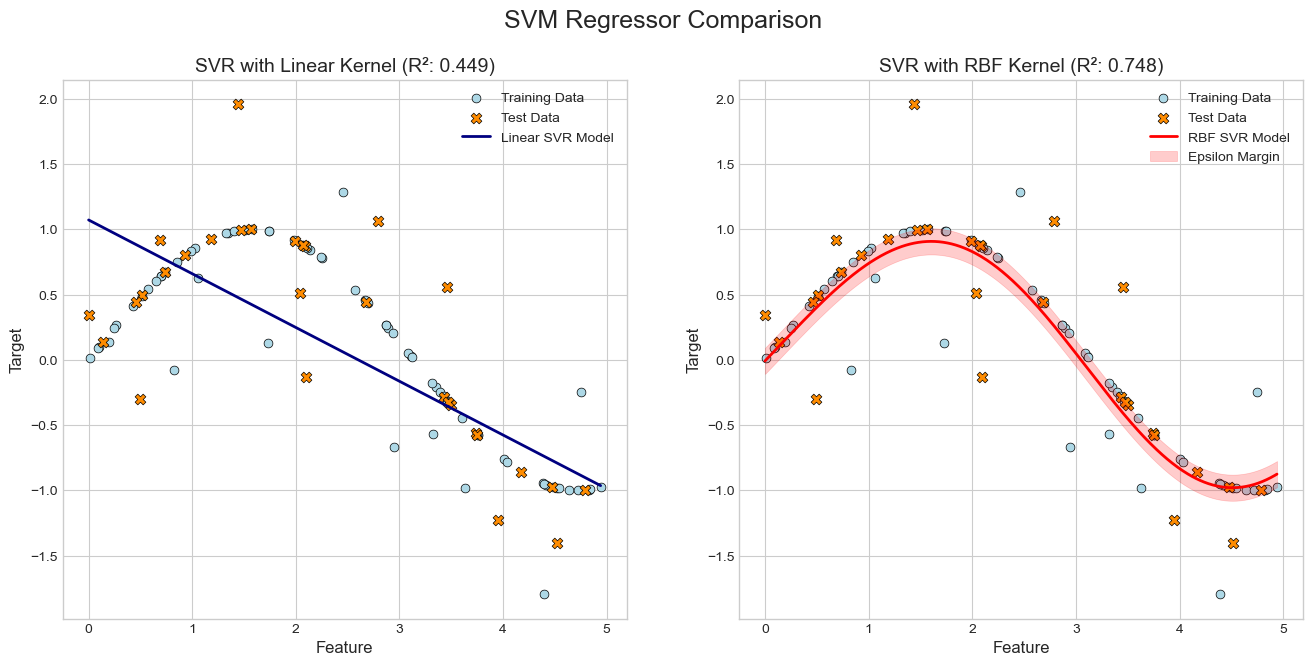

In [29]:
# =============================================================================
# STEP 1: IMPORT LIBRARIES
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR # "SVR" stands for Support Vector Regressor
from sklearn.metrics import mean_squared_error, r2_score

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 2: CREATE THE DATASET
# =============================================================================
# Set a seed for reproducible random numbers
rng = np.random.RandomState(1)

# Create the feature (X) and target (y) based on the provided image
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Add significant noise to every 5th data point to create outliers
y[::5] += 2 * (0.5 - rng.rand(20))


# =============================================================================
# STEP 3: SPLIT DATA INTO TRAINING AND TESTING SETS
# =============================================================================
# Split data for valid model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# =============================================================================
# STEP 4: TRAIN THE SVR MODELS (ON THE TRAINING DATA)
# =============================================================================
# a) SVR with a Linear Kernel
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

# b) SVR with an RBF Kernel
# C and gamma are important hyperparameters; we'll use the defaults for this demo.
rbf_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
rbf_svr.fit(X_train, y_train)


# =============================================================================
# STEP 5: EVALUATE THE MODELS ON THE TEST SET
# =============================================================================
print("="*50)
print("           Model Performance on Test Set              ")
print("="*50)

# Evaluate the Linear SVR
print("\n--- Linear Kernel SVR ---")
y_pred_linear = linear_svr.predict(X_test)
print(f"R-squared (R²): {r2_score(y_test, y_pred_linear):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear):.4f}")

# Evaluate the RBF SVR
print("\n--- RBF Kernel SVR ---")
y_pred_rbf = rbf_svr.predict(X_test)
print(f"R-squared (R²): {r2_score(y_test, y_pred_rbf):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rbf):.4f}")
print("="*50)


# =============================================================================
# STEP 6: VISUALIZE AND COMPARE THE REGRESSION FITS
# =============================================================================
# Create a smooth range of X values for plotting the model's prediction line
X_line = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]

# Get predictions from both models
y_line_linear = linear_svr.predict(X_line)
y_line_rbf = rbf_svr.predict(X_line)

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot for Linear SVR ---
axes[0].scatter(X_train, y_train, s=40, c='lightblue', edgecolor='k', label='Training Data')
axes[0].scatter(X_test, y_test, s=60, c='darkorange', marker='X', edgecolor='k', label='Test Data')
axes[0].plot(X_line, y_line_linear, color='navy', lw=2, label='Linear SVR Model')
axes[0].set_title(f'SVR with Linear Kernel (R²: {r2_score(y_test, y_pred_linear):.3f})', fontsize=14)
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Target')
axes[0].legend()

# --- Plot for RBF SVR ---
axes[1].scatter(X_train, y_train, s=40, c='lightblue', edgecolor='k', label='Training Data')
axes[1].scatter(X_test, y_test, s=60, c='darkorange', marker='X', edgecolor='k', label='Test Data')
axes[1].plot(X_line, y_line_rbf, color='red', lw=2, label='RBF SVR Model')
# Visualize the SVR "epsilon tube" or margin
axes[1].fill_between(X_line.ravel(), y_line_rbf - rbf_svr.epsilon, y_line_rbf + rbf_svr.epsilon,
                     color='red', alpha=0.2, label='Epsilon Margin')
axes[1].set_title(f'SVR with RBF Kernel (R²: {r2_score(y_test, y_pred_rbf):.3f})', fontsize=14)
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Target')
axes[1].legend()

fig.suptitle('SVM Regressor Comparison', fontsize=18)
plt.show()

# Decision trees

## Decision tree classifier

Training set size: 105 samples
Testing set size: 45 samples

Training the model...
Model training complete.

           Model Performance on Test Set              
Accuracy: 93.33%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Visualizing the learned Decision Tree...


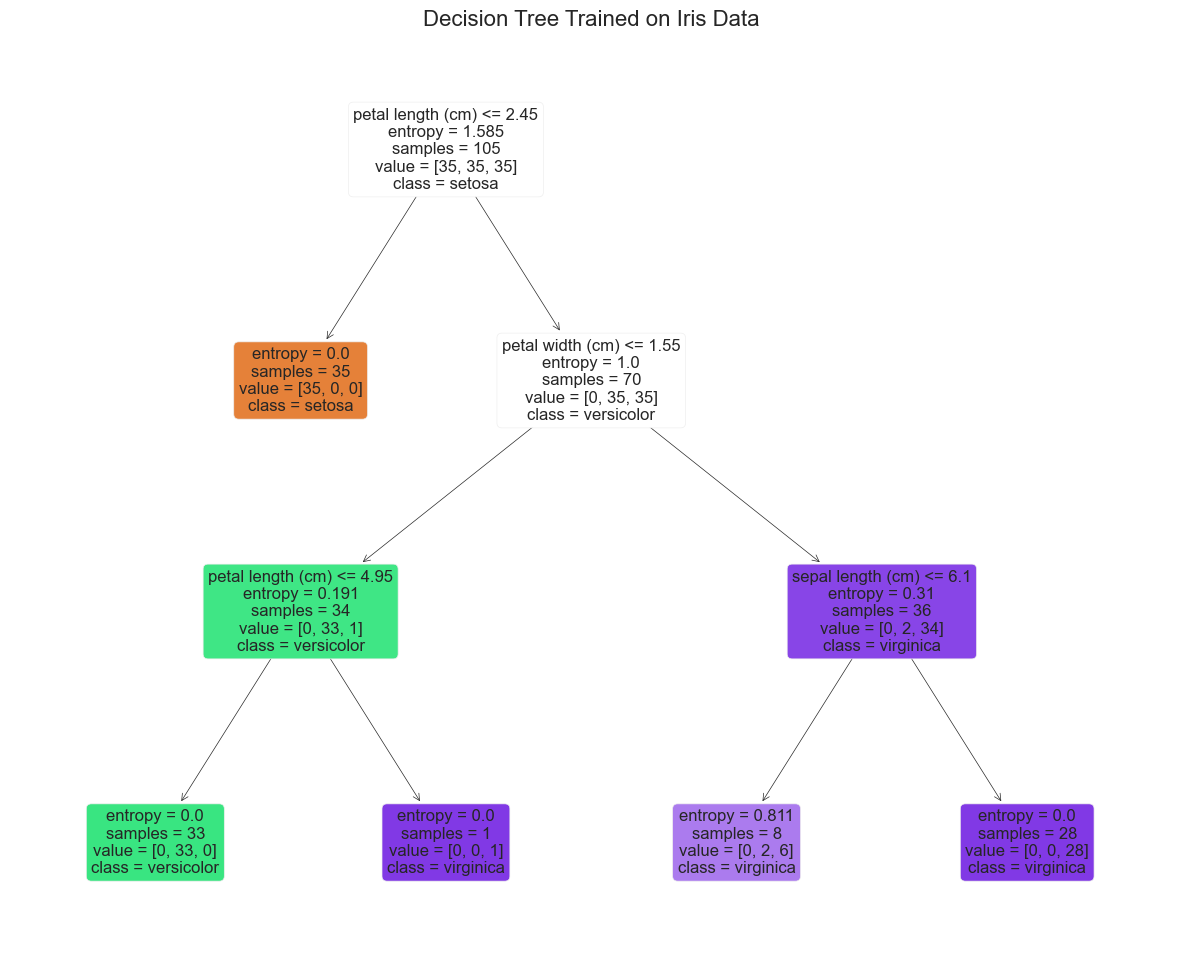


Visualizing the performance on the test set...


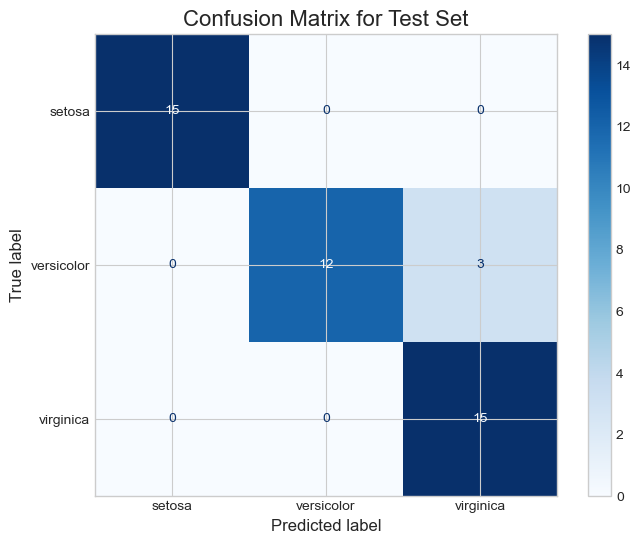

In [30]:
# =============================================================================
# STEP 1: IMPORT LIBRARIES
# =============================================================================
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 2: LOAD THE IRIS DATASET
# =============================================================================
iris = load_iris()
X = iris.data
y = iris.target


# =============================================================================
# STEP 3: SPLIT DATA INTO TRAINING AND TESTING SETS
# =============================================================================
# This is a crucial step to evaluate the model's performance on unseen data.
# We use random_state for reproducible results and stratify=y to maintain
# the same proportion of classes in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


# =============================================================================
# STEP 4: DEFINE AND TRAIN THE DECISION TREE MODEL
# =============================================================================
# We define the classifier with max_depth=3 to prevent overfitting.
# random_state is used for reproducibility of the model itself.
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42) # by default criterion= 'gini'

# Train the model using ONLY the training data
print("\nTraining the model...")
clf.fit(X_train, y_train)
print("Model training complete.")


# =============================================================================
# STEP 5: EVALUATE THE MODEL ON THE TEST SET
# =============================================================================
# Make predictions on the unseen test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

print("\n" + "="*50)
print("           Model Performance on Test Set              ")
print("="*50)
print(f"Accuracy: {accuracy:.2%}\n")

# Display a detailed classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))
print("="*50)


# =============================================================================
# STEP 6: VISUALIZE THE RESULTS
# =============================================================================

# --- Visualization 1: The Decision Tree Structure ---
# This shows the rules the model learned from the training data.
print("\nVisualizing the learned Decision Tree...")
fig1, ax1 = plt.subplots(figsize=(15, 12))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=12,
    ax=ax1
)
ax1.set_title("Decision Tree Trained on Iris Data", fontsize=16)
plt.show()


# --- Visualization 2: Confusion Matrix ---
# This shows how many predictions were correct and incorrect for each class.
print("\nVisualizing the performance on the test set...")
fig2, ax2 = plt.subplots(figsize=(8, 6))
metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues,
    ax=ax2
)
ax2.set_title('Confusion Matrix for Test Set', fontsize=16)
plt.show()

## Decision tree regressor

Training set size: 75 samples
Testing set size: 25 samples

Training the model...
Model training complete.

           Model Performance on Test Set              
Mean Squared Error (MSE): 0.3625
R-squared (R²) Score: 0.6063


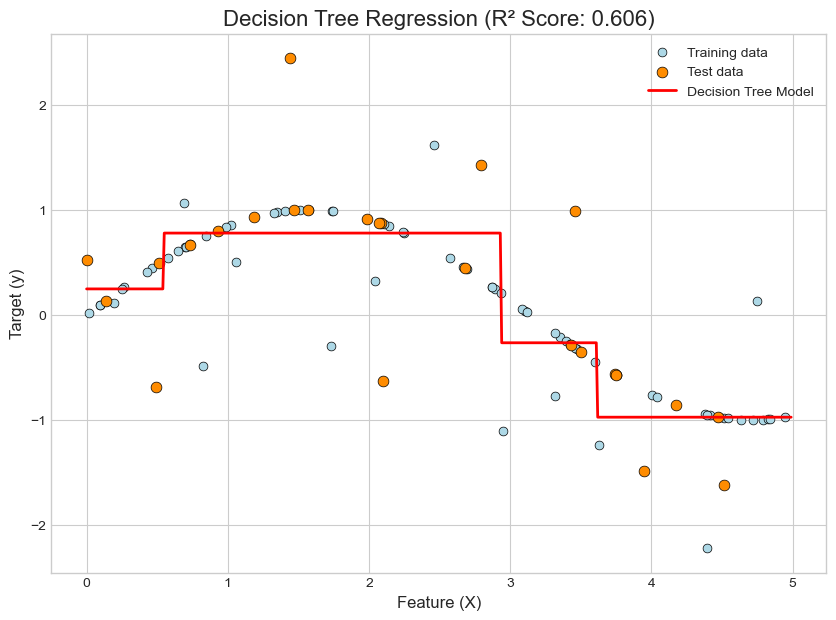


Visualizing the learned Decision Tree...


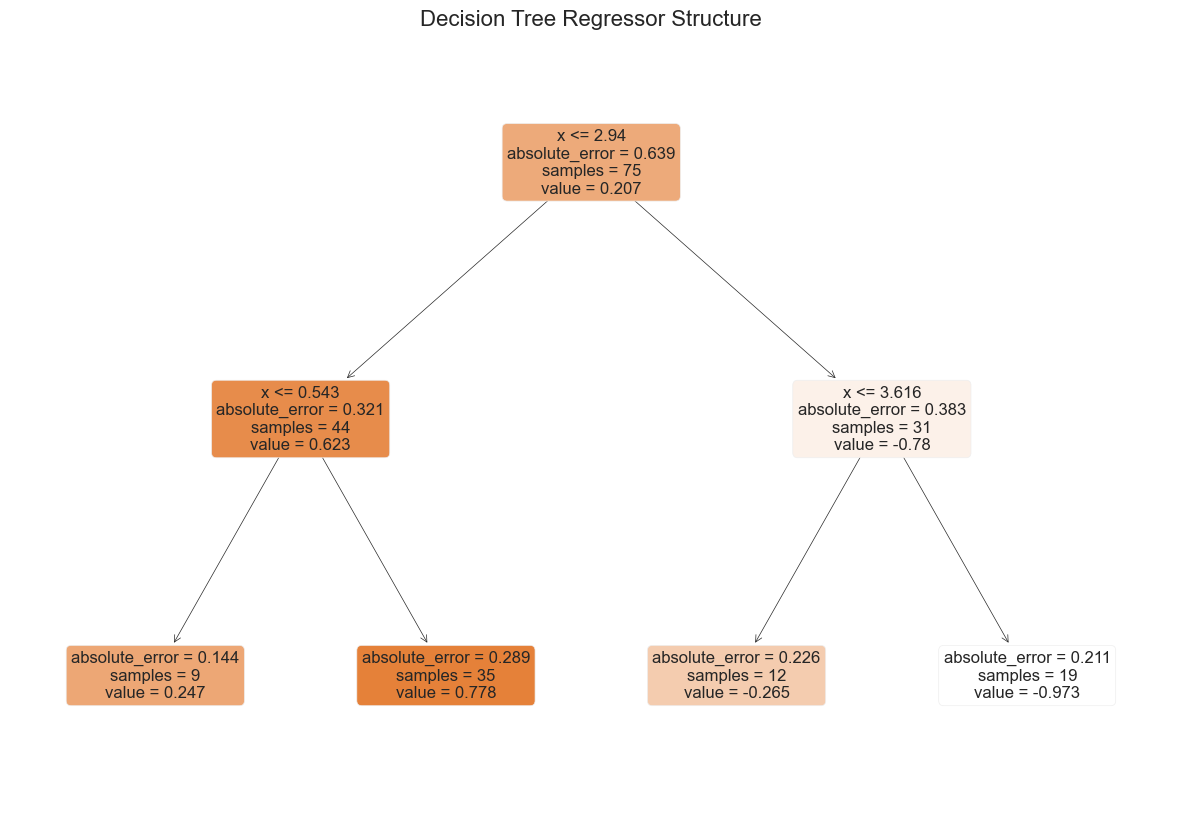

In [31]:
# =============================================================================
# STEP 1: IMPORT LIBRARIES
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Use a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')


# =============================================================================
# STEP 2: CREATE THE DATASET
# =============================================================================
# Set a seed for reproducible random numbers
rng = np.random.RandomState(1)

# Create the feature (X) and target (y)
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Add significant noise to every 5th data point to create outliers
y[::5] += 3 * (0.5 - rng.rand(20))


# =============================================================================
# STEP 3: SPLIT DATA INTO TRAINING AND TESTING SETS
# =============================================================================
# This is crucial for evaluating the model's generalization ability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


# =============================================================================
# STEP 4: DEFINE AND TRAIN THE DECISION TREE REGRESSOR
# =============================================================================
# We define the regressor with max_depth=2 to prevent overfitting
regr = DecisionTreeRegressor(criterion = 'absolute_error', max_depth=2, random_state=42) # by default criterion= 'squared_error'

# Train the model using ONLY the training data
print("\nTraining the model...")
regr.fit(X_train, y_train)
print("Model training complete.")


# =============================================================================
# STEP 5: EVALUATE THE MODEL ON THE TEST SET
# =============================================================================
# Make predictions on the unseen test data
y_pred = regr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("           Model Performance on Test Set              ")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print("="*50)


# =============================================================================
# STEP 6: VISUALIZE THE RESULTS
# =============================================================================

# --- Visualization 1: Regression Fit Plot ---
# Create a smooth range of X values for plotting the model's prediction line
X_line = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_line = regr.predict(X_line)

plt.figure(figsize=(10, 7))
# Plot the training and test data points
plt.scatter(X_train, y_train, s=40, edgecolor="black", c="lightblue", label="Training data")
plt.scatter(X_test, y_test, s=60, edgecolor="black", c="darkorange", label="Test data")
# Plot the regression model's prediction line
plt.plot(X_line, y_line, color="red", label="Decision Tree Model", linewidth=2)

plt.title(f"Decision Tree Regression (R² Score: {r2:.3f})", fontsize=16)
plt.xlabel("Feature (X)", fontsize=12)
plt.ylabel("Target (y)", fontsize=12)
plt.legend()
plt.show()


# --- Visualization 2: The Decision Tree Structure ---
# This shows the exact rules the model learned. The 'value' in each node
# is the prediction for any sample that falls into that node.
print("\nVisualizing the learned Decision Tree...")
plt.figure(figsize=(15, 10))
plot_tree(
    regr,
    feature_names=["x"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Regressor Structure", fontsize=16)
plt.show()

# GENETIC ALGORITHMS

--- Starting Genetic Algorithm for the Knapsack Problem ---
Items (Value, Weight): [(10, 3), (0, 8), (3, 7), (2, 3), (10, 2), (9, 13), (0, 0)]
Generation  10 | Best Fitness: 29
Generation  20 | Best Fitness: 29
Generation  30 | Best Fitness: 29
Generation  40 | Best Fitness: 31
Generation  50 | Best Fitness: 34
Generation  60 | Best Fitness: 34
Generation  70 | Best Fitness: 34
Generation  80 | Best Fitness: 34
Generation  90 | Best Fitness: 34
Generation 100 | Best Fitness: 34

           Genetic Algorithm Finished             
Best Solution (Chromosome): [1, 0, 1, 1, 1, 1, 1]
Selected Item Indices: [0, 2, 3, 4, 5, 6]
Total Value: 34
Total Weight: 28 (Capacity: 30)
Final Fitness Score: 34


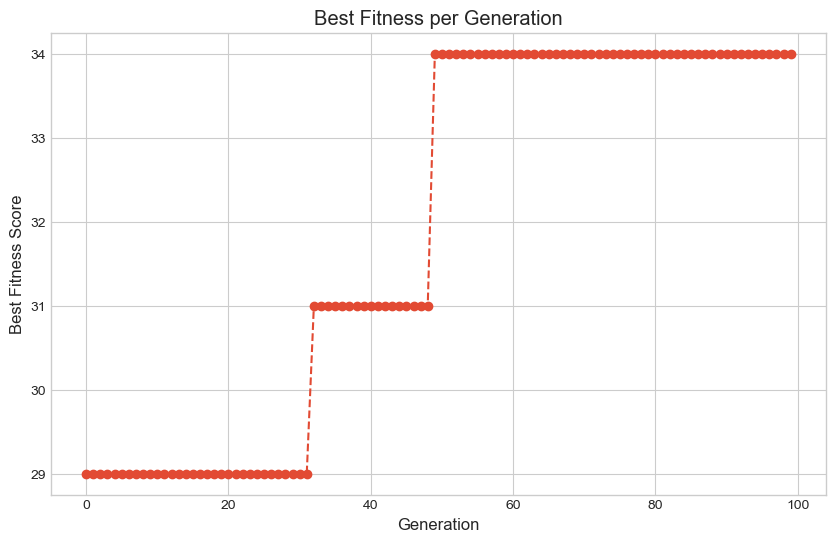

In [32]:
# =============================================================================
# STEP 1: IMPORTS and GLOBAL CONSTANTS
# =============================================================================
import random
import matplotlib.pyplot as plt

# --- GA Parameters ---
KNAPSACK_CAPACITY = 30  # Max carry weight: M = 30
POPULATION_SIZE = 10    # Number of chromosomes: m = 10
MAX_GENERATIONS = 100   # Number of generations: G = 100
NUM_ITEMS = 7           # Number of available items: n = 7

# --- Evolution Parameters ---
ELITE_PERCENT = 0.2
MUTATION_CHANCE = 0.08

# =============================================================================
# STEP 2: PROBLEM SETUP (ITEMS)
# =============================================================================
# Using a seed makes the "random" items the same every time for reproducibility.
random.seed(42)
# item generation rule: (value: 0-10, weight: 0-15)
ITEMS = [(random.randint(0, 10), random.randint(0, 15)) for _ in range(NUM_ITEMS)]

# =============================================================================
# STEP 3: GENETIC ALGORITHM FUNCTIONS
# =============================================================================
# These functions do not need to be changed.

def initialize_population(pop_size, num_items):
    """Creates an initial population of random individuals (chromosomes)."""
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(pop_size)]

def calculate_fitness(individual, items, capacity):
    """
    Calculates the fitness of an individual. Fitness is the total value of items,
    but returns 0 if the knapsack is over capacity.
    """
    total_value = 0
    total_weight = 0
    for selection, item in zip(individual, items):
        if selection == 1:
            total_value += item[0]
            total_weight += item[1]
            
    if total_weight > capacity:
        return 0
    else:
        return total_value

def evolve_population(population):
    """
    Evolves the population through selection, crossover, and mutation
    to create the next generation.
    """
    sorted_population = sorted(population,
                               key=lambda ind: calculate_fitness(ind, ITEMS, KNAPSACK_CAPACITY),
                               reverse=True)
    
    parent_count = int(ELITE_PERCENT * len(sorted_population))
    parents = sorted_population[:parent_count]
    
    # Ensure at least two parents for crossover if possible
    if len(parents) < 2:
        parents = sorted_population[:2]
        
    children = []
    desired_child_count = POPULATION_SIZE - len(parents)
    
    while len(children) < desired_child_count:
        male = random.choice(parents)
        female = random.choice(parents)
        crossover_point = random.randint(1, NUM_ITEMS - 1)
        child = male[:crossover_point] + female[crossover_point:]
        children.append(child)
        
    for child in children:
        if MUTATION_CHANCE > random.random():
            mutation_point = random.randint(0, NUM_ITEMS - 1)
            child[mutation_point] = 1 - child[mutation_point]
            
    parents.extend(children)
    return parents

# =============================================================================
# STEP 4: MAIN EXECUTION BLOCK (IMPLEMENTATION OF main())
# =============================================================================
def main():
    """Runs the main Genetic Algorithm loop."""
    population = initialize_population(POPULATION_SIZE, NUM_ITEMS)
    best_fitness_history = []

    print("--- Starting Genetic Algorithm for the Knapsack Problem ---")
    print(f"Items (Value, Weight): {ITEMS}")
    
    for gen in range(MAX_GENERATIONS):
        population = evolve_population(population)
        sorted_population = sorted(population,
                                   key=lambda ind: calculate_fitness(ind, ITEMS, KNAPSACK_CAPACITY),
                                   reverse=True)
        best_individual_this_gen = sorted_population[0]
        best_fitness_this_gen = calculate_fitness(best_individual_this_gen, ITEMS, KNAPSACK_CAPACITY)
        best_fitness_history.append(best_fitness_this_gen)
        
        # Optional: Print progress every 10 generations
        if (gen + 1) % 10 == 0:
            print(f"Generation {gen + 1:3d} | Best Fitness: {best_fitness_this_gen}")

    # --- Final Results ---
    best_solution = sorted_population[0]
    best_fitness = calculate_fitness(best_solution, ITEMS, KNAPSACK_CAPACITY)
    
    final_value = 0
    final_weight = 0
    selected_items = []
    for i, sel in enumerate(best_solution):
        if sel == 1:
            final_value += ITEMS[i][0]
            final_weight += ITEMS[i][1]
            selected_items.append(i)

    print("\n" + "="*50)
    print("           Genetic Algorithm Finished             ")
    print("="*50)
    print(f"Best Solution (Chromosome): {best_solution}")
    print(f"Selected Item Indices: {selected_items}")
    print(f"Total Value: {final_value}")
    print(f"Total Weight: {final_weight} (Capacity: {KNAPSACK_CAPACITY})")
    print(f"Final Fitness Score: {best_fitness}")
    print("="*50)

    # --- Plotting the results ---
    plt.figure(figsize=(10, 6))
    plt.plot(range(MAX_GENERATIONS), best_fitness_history, marker='o', linestyle='--')
    plt.title('Best Fitness per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Score')
    plt.grid(True)
    plt.show()


# This standard block ensures the main() function is called when the script is run
if __name__ == "__main__":
    main()